<font size="6"><p style="text-align:center"><b>**Исследование объявлений о продаже квартир**</b></p></font>

<font size="5">**Описание проекта** </font>

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1 id="Содержание">Содержание<span class="tocSkip"></span></h1>  
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметры-объектов,-построив-отдельные-гистограммы-для-каждого-из-них" data-toc-modified-id="Изучим-параметры-объектов,-построив-отдельные-гистограммы-для-каждого-из-них-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметры объектов, построив отдельные гистограммы для каждого из них</a></span></li><li><span><a href="#Как-быстро-продавались-квартиры?" data-toc-modified-id="Как-быстро-продавались-квартиры?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Как быстро продавались квартиры?</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</a></span></li><li><span><a href="#Средняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Средняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li><li><span><a href="#Как-стоимость-объектов-зависит-от-расстояния-до-центра-города-Санкт-Петербурга?" data-toc-modified-id="Как-стоимость-объектов-зависит-от-расстояния-до-центра-города-Санкт-Петербурга?-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Как стоимость объектов зависит от расстояния до центра города Санкт-Петербурга?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

#добавим данные строки кода, чтобы игнорировать ошибку. На результат кода это не влияет.
warnings.filterwarnings("ignore")

In [2]:
#Открываем файл с данными
try:
    data = pd.read_csv('C:/Users/user/practicum/Porfolio/3.Real_estate_market_analysis/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
data.head(10) #Выведем на экран первые 10 строк датафрейма, чтобы ознакомиться с данными.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 Ниже приведено описание данных, содержащихся в столбцах:
 
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)\
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м)\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — общая площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении\

In [4]:
# дополнительно выведем на экран информацию о датафрейме и изучим, какие типы данных находятся в различных столбцах,
# а также кол-во строк в них
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистрограмму для всех числовых столбцов таблицы на одном графике:

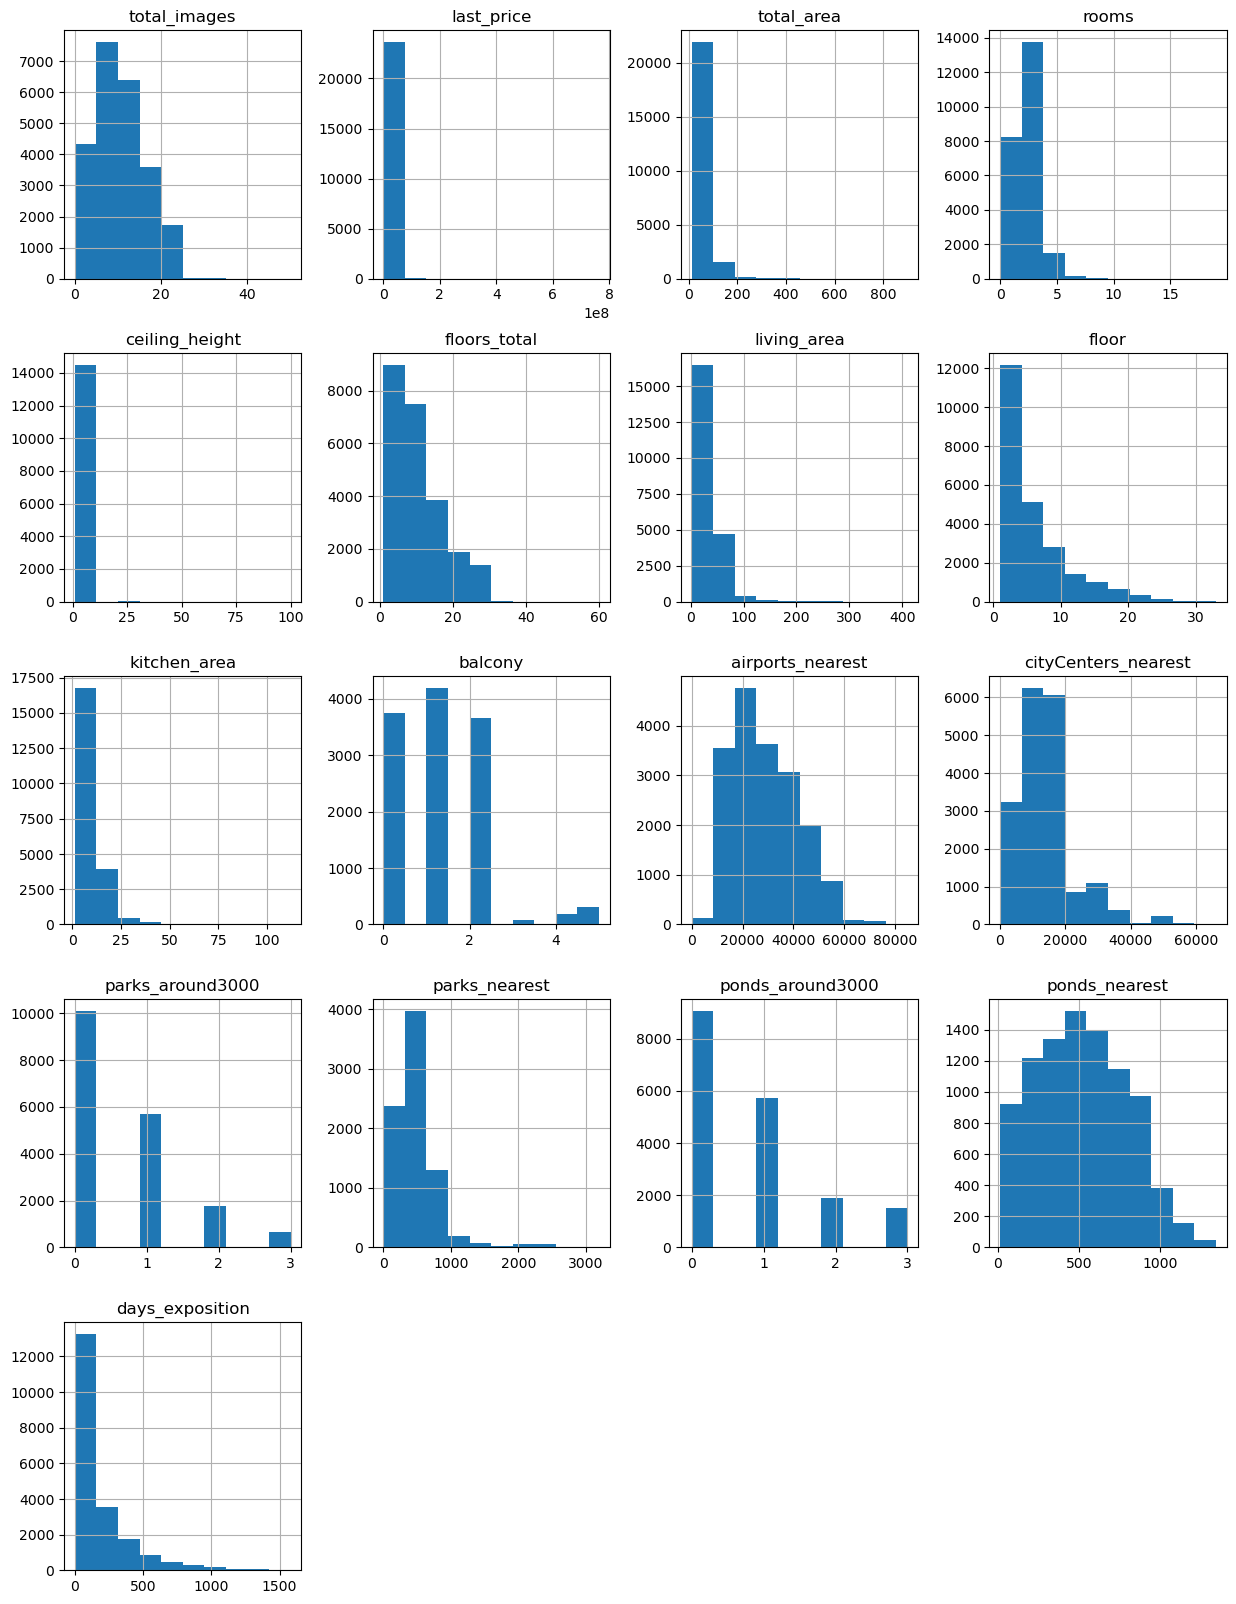

In [5]:
data.hist(figsize=(15, 20));

[Вернуться в начало](#Содержание)

### Предобработка данных

#### Пропущенные значения

Для начала определим, в каких столбцах есть пропуски и найдем их количество в каждом столбце:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Дополнительно посмотрим долю пропусков в каждом из столбцов

In [7]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Как можно заметить из результатов метода `info()`, в некоторых столбцах отсутствует большое количество данных.  
Заполним пропущенные значения в столбцах.  
В столбце `balcony` заменим все пропуски на 0, потому что логично предположить, что если при заполнении объявления не указали количество балконов, то их(балконов) просто нет.

In [8]:
data ['balcony'] = data ['balcony'].fillna(0)

В столбце `is_apartment` содержатся данные булева типа. Соответственно, если значение пропущено, то пропуск заполним значением `False`, что значит, что это не апартаменты.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В описании проекта сказано, что данные в столбцах `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` относятся к данным, полученным автоматически. Поэтому логично предположить, что если в столбце `parks_around3000` пропущено значение, то в столбце `parks_nearest` так же будет пропущенное значение. Потому что при автоматическом заполнении данных системой, она поняла, что в радиусе  
3000 м парки отсутствуют, а парки, находящиеся на расстоянии более чем 3000 м, нас не интересуют. Не станем заполнять пропущенные значения в столбцах `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.
  
Исследуем столбец `floors_total`:

In [10]:
print ('Кол-во пропущенных значений в столбце floors_total равно:', data['floors_total'].isna().sum())
(data['floors_total'].isna().sum())/(data.shape[0])*100 # Посчитаем процент пропущенных значений в столбце floors_total

Кол-во пропущенных значений в столбце floors_total равно: 86


0.36288450989493226

В столбце `floors_total` значения пропущены в 86 строках, что составляет 0.36% от всех строк. Удалим строки с пропущенными значениями.

In [11]:
data = data.dropna(subset = ['floors_total'])
#data.info()

In [12]:
print ('Кол-во пропущенных значений в столбце locality_name равно:', data['locality_name'].isna().sum())
(data['locality_name'].isna().sum())/(data.shape[0])*100 #Посчитаем процент пропущенных значений в столбце locality_name

Кол-во пропущенных значений в столбце locality_name равно: 48


0.2032778554186253

Аналогично поступим со столбцом `locality_name` - удалим все строки, в которых имеются пропущенные значения. Таких строк всего 48, что составляет 0,203% от всех строк.

In [13]:
data = data.dropna(subset = ['locality_name'])
#data.info()

В столбце `ceiling_height` заполним пропущенные значения медианой, которая будет рассчитываться в зависимости от значений  столбца `locality_name` (Название населенного пункта).

In [14]:
for potolok in data['locality_name'].unique():
    data.loc[(data['locality_name'] == potolok) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == potolok), 'ceiling_height'].median()

In [15]:
print ('Кол-во пропущенных значений в столбце ceiling_height равно:', data['ceiling_height'].isna().sum())
# Посчитаем процент пропущенных значений в столбце ceiling_height
(data['ceiling_height'].isna().sum())/(data.shape[0])*100 

Кол-во пропущенных значений в столбце ceiling_height равно: 120


0.5092297899427116

После обработки пропусков, в столбце `ceiling_height` осталось 120 пропущенных значений. Удалим данные строки, т.к. они составляют 0,5 % от всех строк.

In [16]:
data = data.dropna(subset = ['ceiling_height'])
#data.isna().sum()

В столбце `living_area` пропущенные значения заполним следующим образом:  
* Посчитаем отношение медианного значения жилой площади квартиры, к медианному значению общей площади квартиры и сохраним его в переменную `living_area_coeff`;
* С помощью цикла пройдемся по всем строкам, в которых в столбце `living_area` имеется пропущенное значение;
* Перемножим `living_area_coeff` на соответствующее значение из столбца `total_area`.

In [17]:
living_area_coeff = data['living_area'].median() / data['total_area'].median() 
#print (living_area_coeff)
for l in data['living_area'].isna():
    data['living_area'].fillna(living_area_coeff * data['total_area'], inplace=True)

Аналогично поступим с пропущенными значениями столбца `kitchen_area`.

In [18]:
kitchen_area_coeff = data['kitchen_area'].median() / data['total_area'].median()
#print (kitchen_area_coeff)
for k in data['kitchen_area'].isna():
    data['kitchen_area'].fillna(kitchen_area_coeff * data['total_area'], inplace=True)

Пропущенные значения в столбцах `airports_nearest` и `cityCenters_nearest` заполнять не будем, потому что эти значения не повлияют на характер связи между заполняемой переменной и остальными.

Пропущенные значения в столбце `days_exposition` означают, что квартира ещё находится в состоянии продажи. Поэтому, на момент сбора данных, объявление ещё не было снято с публикации. Пропуски в данном столбце обрабатывать не будем.

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5409
cityCenters_nearest      5386
parks_around3000         5385
parks_nearest           15415
ponds_around3000         5385
ponds_nearest           14411
days_exposition          3145
dtype: int64

**Промежуточный вывод:**  
Как видно из результата метода `info()`, пропущенные значения были удалены из семи столбцов. Также, за счет удаления строк, сократилось и количество пропущенных значений в тех столбцах, в которых пропущенные значения не обрабатывались.

[Вернуться в начало](#Содержание)

#### Типы данных

Для начала найдем столбцы, в которых нужно изменить тип данных.

In [20]:
data.info() #воспользуемся методом info(), чтобы было видно тип данных каждого столбца

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23445 non-null  int64  
 1   last_price            23445 non-null  float64
 2   total_area            23445 non-null  float64
 3   first_day_exposition  23445 non-null  object 
 4   rooms                 23445 non-null  int64  
 5   ceiling_height        23445 non-null  float64
 6   floors_total          23445 non-null  float64
 7   living_area           23445 non-null  float64
 8   floor                 23445 non-null  int64  
 9   is_apartment          23445 non-null  bool   
 10  studio                23445 non-null  bool   
 11  open_plan             23445 non-null  bool   
 12  kitchen_area          23445 non-null  float64
 13  balcony               23445 non-null  float64
 14  locality_name         23445 non-null  object 
 15  airports_nearest   

In [21]:
data.head() #для удобства дополнительно выведем первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700,16.0,51.000000,8,False,...,25.000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.615,11.0,18.600000,1,False,...,11.000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.700,5.0,34.300000,4,False,...,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.700,14.0,91.730769,9,False,...,27.825,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030,14.0,32.000000,13,False,...,41.000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Из вышеуказанных данных о датафрейме `data`, сделаем вывод, что переобразование типа данных необходимо выполнить в следующих столбцах:
* `last_price` - из float в int. В столбце с ценой указаны в большие значения и цифры после запятой не играют ключевой роли. Поэтому преобразуем значения в целые числа, отбросив числа после запятой.
* `floors_total` - из float в int. В столбце с количеством этажей цифры после запятой не играют ключевой роли. Этаж не может быть 2,5. Поэтому преобразуем значения в целые числа. 
* `balcony` - из float в int. Аналогично со столбцом `floors_total`.
* `first_day_exposition` - из object в datatime. В данном столбце указана дата публикации объявления. Для удобства изменим тип данных и приведем их к легко читаемому виду.

В столбцах `airports_nearest`, `days_exposition`, `parks_around3000`, `ponds_around3000` изменять тип данных не будем, т.к. наличие пропущенных значений не даст нам этого сделать.

Преобразуем тип данных в выбранных столбцах.

In [22]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

 # С помощью метода info(), убедимся, что написанный код выполнил свою задачу по преобразованию типа данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23445 non-null  int64         
 1   last_price            23445 non-null  int32         
 2   total_area            23445 non-null  float64       
 3   first_day_exposition  23445 non-null  datetime64[ns]
 4   rooms                 23445 non-null  int64         
 5   ceiling_height        23445 non-null  float64       
 6   floors_total          23445 non-null  int32         
 7   living_area           23445 non-null  float64       
 8   floor                 23445 non-null  int64         
 9   is_apartment          23445 non-null  bool          
 10  studio                23445 non-null  bool          
 11  open_plan             23445 non-null  bool          
 12  kitchen_area          23445 non-null  float64       
 13  balcony         

In [23]:
data.head(5) # С помощью метода head(), убедимся, что данные приобрели легкочитаемый и понятный вид.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.000000,8,False,...,25.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.600000,1,False,...,11.000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.300000,4,False,...,8.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.700,14,91.730769,9,False,...,27.825,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.000000,13,False,...,41.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


[Вернуться в начало](#Содержание)


####  Дубликаты

Для начала проверим, есть ли в таблице явные дубликаты, т.е. строки, которые полностью повторяют уже встречавшиеся

In [24]:
data.duplicated().sum()

0

Явных дубликотов в датафрейме нет.
Изучим уникальные значения в столбце `locality_name`.

In [25]:
data['locality_name'].sort_values().unique() # Изучим уникальные значения в столбце locality_name

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В названиях населенных пунктов встречаются неявные дубликаты. К примеру `поселок` и `посёлок`. Произведем замену `ё` на `е`.

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') # Проивзодим замену ё на е.
data['locality_name'].sort_values().unique() #Повторно выводим список уникальных значений, чтобы убедиться, что код сработал.

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

В названиях населенных пунктов очень много неявных дубликатов. Прежде чем избавиться от них, необходимо привести данные к единому виду следующим способом:
* Создадим список слов `data_locality_list`, от которых необходимо избавиться в названиях населенных пунктов;
* C помощью цикла, пройдемся по каждому уникальному списка `data_locality_list`, заменяя их на пустое значение в нашем датафрейме.

In [27]:
data_locality_list = ['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ',
                      'городского типа ','поселок станции ','при железнодорожной станции ',
                      'садовое товарищество ', 'село ', 'станции ', 'имени ']
for i in data_locality_list:
    data['locality_name'] = data['locality_name'].str.replace(i,'')

Теперь, когда из названий населенных пунктов убрано все лишнее, вручную, с помощью метода .replace(), избавимся от оставшихся неявных дубликатов.

In [28]:
data['locality_name'] = data['locality_name'].str.replace('Кингисеппский','Кингисепп')
data['locality_name'] = data['locality_name'].str.replace('Никольское','Никольский')
data['locality_name'] = data['locality_name'].str.replace('Саперное','Саперный')
data['locality_name'] = data['locality_name'].str.replace('Коммунары','Коммунар')

In [29]:
data['locality_name'].sort_values().unique() # Выводим список уникальных значений, чтобы убедиться, что код сработал.

array(['Агалатово', 'Александровская', 'Аннино', 'Барышево', 'Батово',
       'Бегуницы', 'Белогорка', 'Бокситогорск', 'Большая Вруда',
       'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Бор',
       'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины',
       'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Возрождение',
       'Войсковицы', 'Войскорово', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Вырица', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина',
       'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово',
       'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского',
       'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино',
       'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково', 'Заводской',
       'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород',
       'Извара', 'Ильичево', 'Калитино', 'Кальтино', 'Каменногорск',
       'Камышовка', 'Каськово', 'Келози', 'Кивеннапа Север', 'Кикерино',
       'Кингисепп', 'Кипень',

Теперь, когда все неявные дубликаты устранены, повторно проверим столбец `locality_name` на явные дубликаты:

In [30]:
data.duplicated().sum() # Количество явных дубликатов равно нулю.

0

**Промежуточный вывод**  

В данном пункте мы изучили уникальные значения в столбцах с названиями и устранили неявные дубликаты. Как можно увидеть из приведенного выше, в столбце с названиями населенных пунктов содержалось большое количество неявных дубликатов, которые могли исказить результаты исследования.  
Также, дополнительно было проверено наличие явных дубликатов до и после обработки значений. 

[Вернуться в начало](#Содержание)

####  Редкие и выбивающиеся значения

Проверим все столбцы на наличие аномальных и выбивающихся значений.
Если природа аномалии будет понятна и данные действительно искажены, то восстановиим корректное значение.
В противном случае - удалим редкие и выбивающиеся значения.  
Начнем со столбца `ceiling_height`. Выведем список уникальных значений этого столбца:

In [31]:
stroki_do = data.shape[0] # Найдем количество строк, которое содержит таблица до обработки

In [32]:
data['ceiling_height'].sort_values().unique() # выбивающиеся значения есть

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.515,   2.52 ,   2.525,   2.53 ,   2.54 ,
         2.55 ,   2.555,   2.56 ,   2.56 ,   2.57 ,   2.575,   2.58 ,
         2.59 ,   2.6  ,   2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,
         2.63 ,   2.64 ,   2.65 ,   2.65 ,   2.66 ,   2.67 ,   2.675,
         2.68 ,   2.69 ,   2.7  ,   2.71 ,   2.72 ,   2.725,   2.73 ,
         2.74 ,   2.75 ,   2.76 ,   2.77 ,   2.78 ,   2.79 ,   2.8  ,
         2.81 ,   2.82 ,   2.83 ,   2.84 ,   2.85 ,   2.86 ,   2.87 ,
         2.88 ,   2.89 ,   2.9  ,   2.91 ,   2.92 ,   2.93 ,   2.94 ,
         2.95 ,   2.96 ,   2.97 ,   2.98 ,   2.99 ,   3.   ,   3.01 ,
         3.02 ,   3.03 ,   3.04 ,   3.05 ,   3.06 ,   3.07 ,   3.08 ,
         3.09 ,   3.1  ,   3.11 ,   3.12 ,   3.13 ,   3.14 ,   3.15 ,
         3.16 ,   3.17 ,   3.18 ,   3.2  ,   3.21 ,   3.22 ,   3.23 ,
         3.24 ,   3.

Из выведенного списка видно, что в столбце `ceiling_height` имеются редкие и сильно выбивающиеся значения - потолки не могут быть высотой 100 метров или 1 метр. Избавимся от данных значений следующим образом:  
* Значения высоты потолка от 20 до 32 метров, разделим на 10, предположив, что данные значения появились ошибочно. Приведем эти значения в более правдоподобный вид - 2 и 3,2 метра соответственно.
* Значения высоты потолка, которые меньше 2 метров и выше 5 - удалим т.к. природу появления данных значений объяснить трудно, а понять на что их заменить - ещё труднее.

In [33]:
print ('Кол-во строк в столбце ceiling_height до обработки было равно:', data['ceiling_height'].count())
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 5)]
print ('Кол-во строк в столбце ceiling_height после обработки стало:', data['ceiling_height'].count())
data['ceiling_height'].sort_values().unique()

Кол-во строк в столбце ceiling_height до обработки было равно: 23445
Кол-во строк в столбце ceiling_height после обработки стало: 23425


array([2.   , 2.2  , 2.25 , 2.26 , 2.3  , 2.34 , 2.4  , 2.45 , 2.46 ,
       2.47 , 2.48 , 2.49 , 2.5  , 2.51 , 2.515, 2.52 , 2.525, 2.53 ,
       2.54 , 2.55 , 2.555, 2.56 , 2.56 , 2.57 , 2.575, 2.58 , 2.59 ,
       2.6  , 2.6  , 2.61 , 2.615, 2.62 , 2.625, 2.63 , 2.64 , 2.65 ,
       2.65 , 2.66 , 2.67 , 2.675, 2.68 , 2.69 , 2.7  , 2.71 , 2.72 ,
       2.725, 2.73 , 2.74 , 2.75 , 2.76 , 2.77 , 2.78 , 2.79 , 2.8  ,
       2.81 , 2.82 , 2.83 , 2.84 , 2.85 , 2.86 , 2.87 , 2.88 , 2.89 ,
       2.9  , 2.91 , 2.92 , 2.93 , 2.94 , 2.95 , 2.96 , 2.97 , 2.98 ,
       2.99 , 3.   , 3.01 , 3.02 , 3.03 , 3.04 , 3.05 , 3.06 , 3.07 ,
       3.08 , 3.09 , 3.1  , 3.11 , 3.12 , 3.13 , 3.14 , 3.15 , 3.16 ,
       3.17 , 3.18 , 3.2  , 3.21 , 3.22 , 3.23 , 3.24 , 3.25 , 3.26 ,
       3.27 , 3.28 , 3.29 , 3.3  , 3.31 , 3.32 , 3.33 , 3.34 , 3.35 ,
       3.36 , 3.37 , 3.38 , 3.39 , 3.4  , 3.42 , 3.43 , 3.44 , 3.45 ,
       3.46 , 3.47 , 3.48 , 3.49 , 3.5  , 3.51 , 3.52 , 3.53 , 3.54 ,
       3.55 , 3.56 ,

Количество удаленных строк всего 20.\
Далее выведем список уникальных значений столбца `airports_nearest`:

In [34]:
data['airports_nearest'].sort_values().unique() # выбивающееся значение есть.

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

Выбивающимся значение является 0 - квартира не может быть расположена в аэропорту. Удалим эту строку из датафрейма.

In [35]:
print ('Кол-во строк в столбце airports_nearest до обработки было равно:', data['airports_nearest'].count())
data = data[(data['airports_nearest'] != 0)]
print ('Кол-во строк в столбце airports_nearest после обработки стало:', data['airports_nearest'].count())

Кол-во строк в столбце airports_nearest до обработки было равно: 18021
Кол-во строк в столбце airports_nearest после обработки стало: 18020


In [36]:
data['balcony'].sort_values().unique() # выбивающихся значений нет

array([0, 1, 2, 3, 4, 5])

In [37]:
data['cityCenters_nearest'].sort_values().unique() # выбивающихся значений нет

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [38]:
data['days_exposition'].sort_values().unique() # выбивающихся значений нет

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

In [39]:
data['floor'].sort_values().unique() # выбивающихся значений нет

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [40]:
data['floors_total'].sort_values().unique() # выбивающиеся значения есть

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 52,
       60])

Значения 52 и 60 выглядят сильно выбивающимся. Предположим, что это может быть здание "Лахта-центр", т.к. в нём общее количество этажей равно 87. Но самый высокий жилой дом Санкт-Петербурга имеет 37 этажей. Поэтому удалим строки, со значениями 52 и 60.

In [41]:
data = data[data['floors_total'] <= 36]
# Убедимся, что строки со значением общего количества этажей, равным 52 и 60 - была удалена
data['floors_total'].sort_values().unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36])

In [42]:
data['kitchen_area'].sort_values().unique() # выбивающихся значений нет

array([  1.3,   2. ,   2.1, ..., 100.7, 107. , 112. ])

In [43]:
data['living_area'].sort_values().unique() # выбивающихся значений нет

array([  2.        ,   3.        ,   5.        , ..., 364.03846154,
       409.        , 409.7       ])

In [44]:
data['total_area'].sort_values().unique() # выбивающееся значение есть

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

Обратим внимание на значение общей площади, равное 12. Очень сомнительно, что может быть квартира 12 м². Однако, с помощью интернета находим, что такая квартира действительно существует. Поэтому удалять данное значение не будем.
Также сильно выбивается значение общей площади, равное 900 м². С помощью интернета можно найти информацию, что самая большая квартира в Санкт-Петербурге составляет 631 м². Значит в данном значении допущена ошибка. Удалим данную строку из датафрейма.

In [45]:
print ('Кол-во строк в столбце total_area до обработки было равно:', data['total_area'].count())
data = data[(data['total_area'] != 900)]
print ('Кол-во строк в столбце total_area после обработки стало:', data['total_area'].count())

Кол-во строк в столбце total_area до обработки было равно: 23422
Кол-во строк в столбце total_area после обработки стало: 23421


In [46]:
data['total_area'].sort_values().unique() # Убедимся, что строка со значением общей жилой площади равной 900 - была удалена

array([ 12. ,  13. ,  13.2, ..., 618. , 631. , 631.2])

In [47]:
data['total_images'].sort_values().unique() # выбивающихся значений нет

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

In [48]:
data['last_price'].sort_values().unique() # выбивающиеся значения есть

array([    12190,    430000,    450000, ..., 330000000, 401300000,
       763000000])

Выбивающимся значение является 12190 - данное значение выглядит сильно неправдоподобно. Квартира не может стоить 12 190 рублей.  Удалим эту строку из датафрейма:

In [49]:
data = data[data['last_price'] >= 13000]
data['last_price'].sort_values().unique()
# Убедимся, что строка со значением цены 12190 была удалена

array([   430000,    450000,    470000, ..., 330000000, 401300000,
       763000000])

In [50]:
data['rooms'].sort_values().unique() # выбивающихся значений нет

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 19],
      dtype=int64)

In [51]:
data['parks_around3000'].sort_values().unique() # выбивающихся значений нет

array([ 0.,  1.,  2.,  3., nan])

In [52]:
data['parks_nearest'].sort_values().unique() # выбивающихся значений нет

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.800e+01, 6.900e+01,
       7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01,
       7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01, 8.300e+01,
       8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01, 9.000e+01,
       9.100e+01, 9.200e+01, 9.300e+01, 9.400e+01, 

Значения, указывающие на то,что парк находится на расстоянии 1 - 9 метров трогать не будем. Т.к. вполне возможно, что эта квартира находится прям на краю парка на который и выходят её окна.

In [53]:
stroki_posle = data.shape[0] # Найдем количество строк, которое осталось в таблице после обработки
stroki_do - stroki_posle # Узнаем, сколько строк было удалено в результате обработки уникальных значений.

25

Нами были найдены выбивающиеся значения из таблицы. Такими значениями стали:
* Чрезвычайно низкие или высокие потолки в квартире;
* Слишком большое количество этажей в доме;
* Очень большая общая площадь квартиры;
* Квартира, расположенная прямо в аэропорту;
* Цена на квартиру, составляющая 12 190 рублей.\
Строки с данными значениями были удалены из датафрейма. Общее количество строк сократилось с 23445 до 23421. Т.е. было удалено всего 25 строк.

[Вернуться в начало](#Содержание)

### Добавление новых столбцов

Добавим столбец `1_meter_price` с ценой одного квадратного метра:

In [54]:
# выполним целочисленное деление, чтобы округлить значения до целых чисел
data['1_meter_price'] = data['last_price']//data['total_area'] 

# изменим тип данных, отбросив числа после запятой
data['1_meter_price'] = (data['1_meter_price'].astype('int'))

Добавим столбец `week_day_exposition` с днём недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [55]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday

Добавим столбец `month_exposition` с месяцем публикации объявления:

In [56]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [57]:
#data['first_day_exposition'].dt.date #приводим к временному формату
#data['first_day_exposition'].astype('datetime64[M]') 

Добавим столбец `year_exposition` с годом публикации объявления:

In [58]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим столбец `type_of_flat` с типом этажа квартиры ( со значеними — «первый», «последний», «другой»):

In [59]:
def type_of_flat(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

row_values = [[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 52, 60]]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
data['type_of_flat'] = data.apply(type_of_flat, axis=1)

Добавим столбец `distance_km` с расстоянием до центра города в километрах (сразу переведем из м в км и округлим до целых значений):

In [60]:
data['distance_km'] = round(data['cityCenters_nearest']/1000)

Выведем первые 5 строк датафрейма, чтобы убедиться, что все необходимые столбцы были добавлены и сделано это было без ошибок

In [61]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1_meter_price,week_day_exposition,month_exposition,year_exposition,type_of_flat,distance_km
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.700,14,91.730769,9,False,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0


Дополнительно проверим новые столбцы на наличие уникальных и выбивающихся значений:

In [62]:
data['type_of_flat'].sort_values().unique() # выбивающихся значений нет

array(['другой', 'первый', 'последний'], dtype=object)

In [63]:
data['week_day_exposition'].sort_values().unique() # выбивающихся значений нет

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [64]:
data['month_exposition'].sort_values().unique() # выбивающихся значений нет

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [65]:
data['year_exposition'].sort_values().unique() # выбивающихся значений нет

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

Повторно построим гистрограмму для всех числовых столбцов таблицы на одном графике, чтобы посмотреть, как изменились данные и гистрограммы по ним:

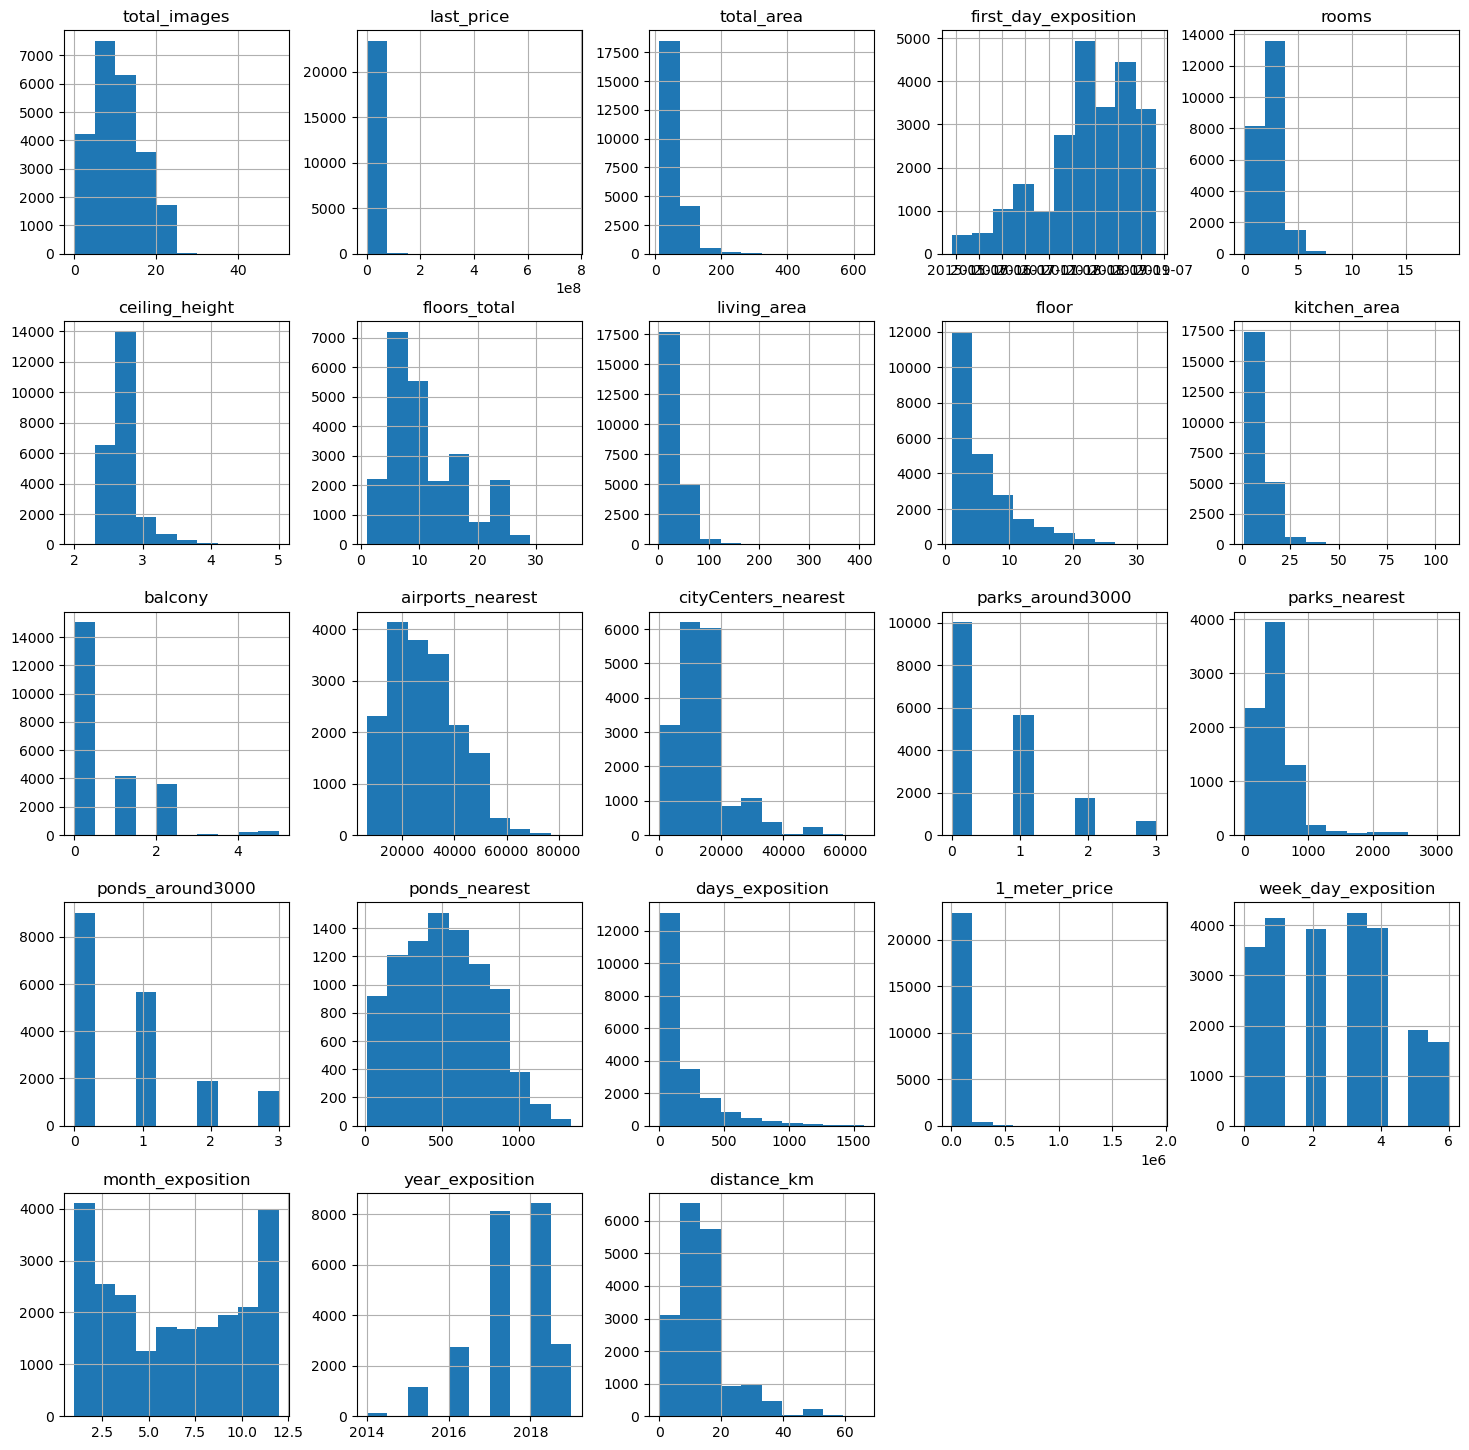

In [66]:
data.hist(figsize=(18, 18));

При сравнении построенной гистрограммы с той, что была построена в самом начале исследования, можно заметить:  
* Изменилась гистрограмма для столбца `total_area`;
* За счет удаления выбивающися значений, изменились гистрограммы столбцов `ceiling_height` и `floors_total`;
* После заполнения пропусков, изменилась гистрограмма для столбца `balcony`.

Мы посчитали и добавили в таблицу новые столбцы, которые помогут нам при проведении анализа данных. Также, дополнительно была построена гистрограмма для  всех числовых столбцов таблицы, отображенная на одном графике.

[Вернуться в начало](#Содержание)

### Исследовательский анализ данных

#### Изучим параметры объектов, построив отдельные гистограммы для каждого из них
Построим гистрограмму, отображающую общую площадь квартир, указанную в столбце `total_area`:

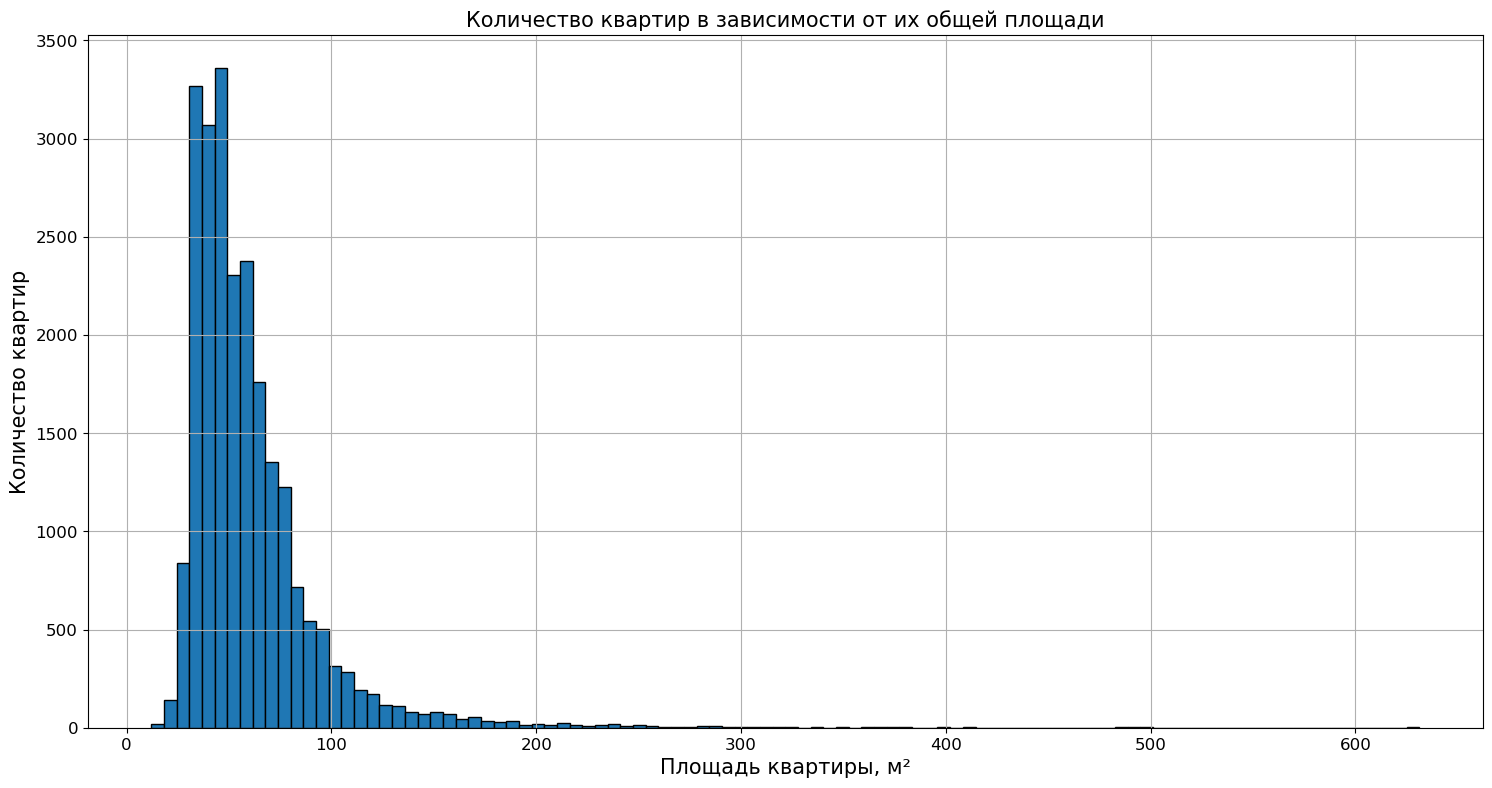

In [67]:
data['total_area'].plot(
                        kind = 'hist',
                        bins = 100,
                        figsize = (18, 9),
                        edgecolor='k'
                        );
plt.title('Количество квартир в зависимости от их общей площади', fontsize = 15)
plt.xlabel('Площадь квартиры, м²', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [68]:
data['total_area'].describe() # Дополнительно выведем характеристики, дающие представление об общей площади квартир.

count    23420.000000
mean        60.314474
std         35.166009
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир имеют общую площадь в промежутке от 40 до 70 м²;
* Квартиры с общей площадью больше 400 м² - единичные случаи;
* Наименьшая общая площадь квартиры составляет 12 м², наибольшая - 631,2 м²;
* Средняя общая площадь квартиры равняется 60,31 м²;
* Медианное значение общей площади квартиры равняется 52 м².

Аналогичным способом построим все следующие гистрограммы.\
Начнем с гистограммы, отображающую жилую площадь квартир, указанную в столбце `living_area`:

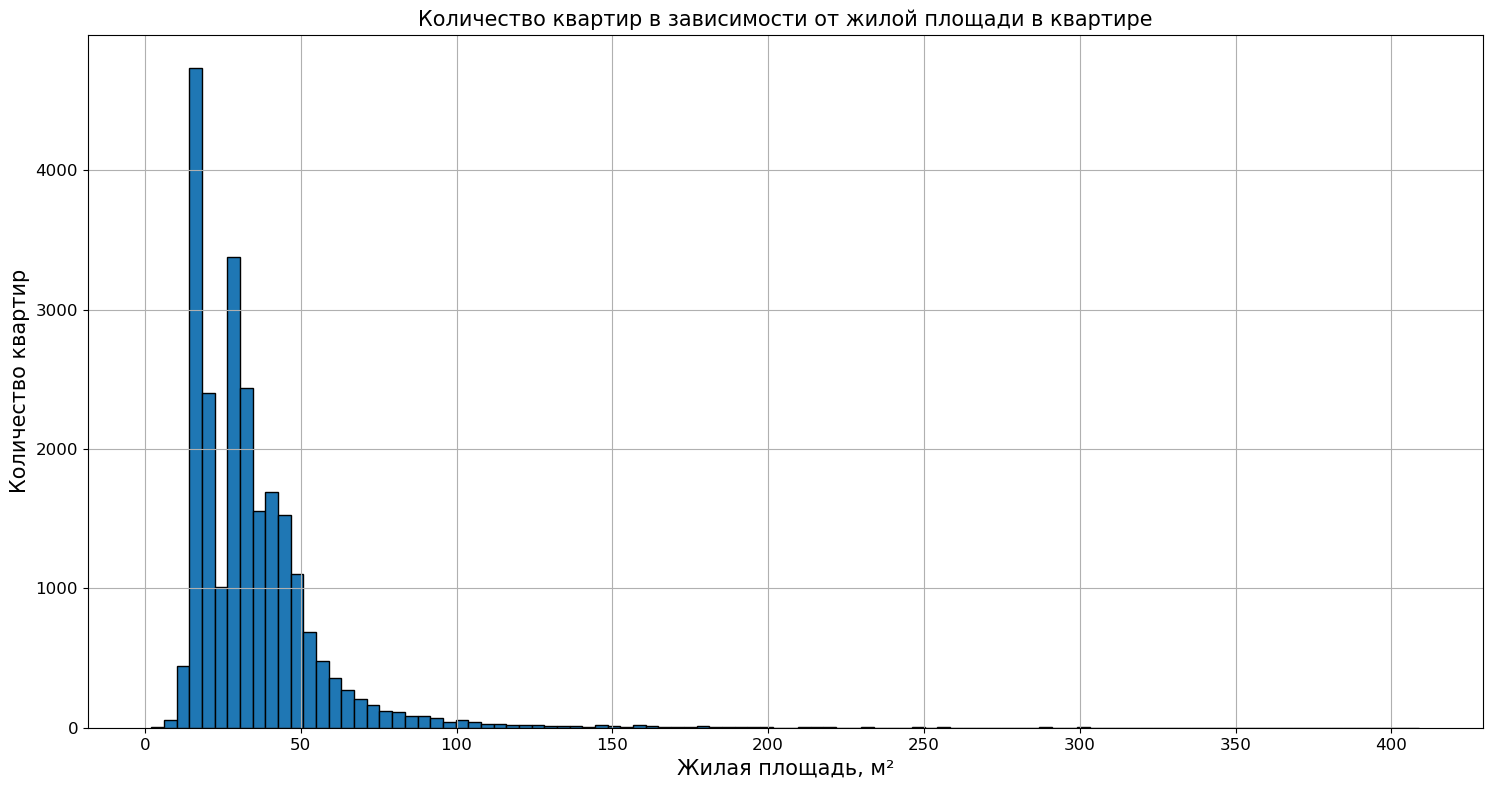

In [69]:
data['living_area'].plot(
                        kind = 'hist',
                        bins = 100,
                        figsize = (18, 9),
                        edgecolor='k'
                        )
plt.title('Количество квартир в зависимости от жилой площади в квартире', fontsize = 15)
plt.xlabel('Жилая площадь, м²', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [70]:
data['living_area'].describe() # Дополнительно выведем характеристики, дающие представление о жилой площади квартир.

count    23420.000000
mean        34.616420
std         22.227222
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир имеют жилую площадь в промежутке от 19 до 42,2 м²;
* Квартиры с жилой площадью больше 200 м² - единичные случаи;
* Наименьшая жилая площадь квартиры составляет 2 м², наибольшая - 409 м²;
* Средняя жилая площадь квартиры равняется 34,61 м²;
* Медианное значение жилой площади квартиры равняется 30 м².

Построим гистрограмму, отображающую площадь кухни, указанную в столбце `kitchen_area`:

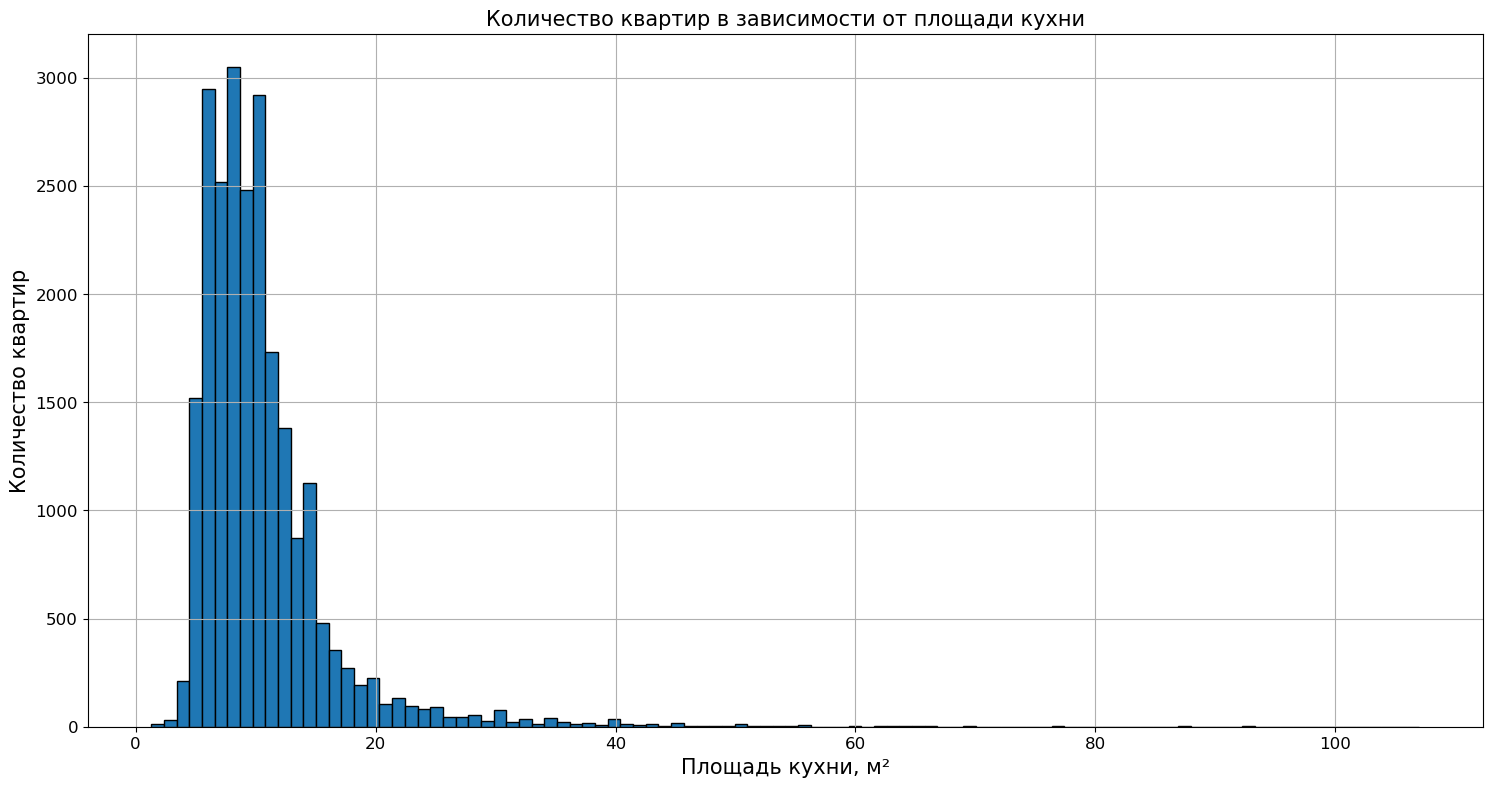

In [71]:
data['kitchen_area'].plot(
                        kind = 'hist',
                        bins = 100,
                        figsize = (18, 9),
                        edgecolor='k'
                        );
plt.title('Количество квартир в зависимости от площади кухни', fontsize = 15)
plt.xlabel('Площадь кухни, м²', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [72]:
data['kitchen_area'].describe() # Дополнительно выведем характеристики, дающие представление о площади кухни в квартире.

count    23420.000000
mean        10.500915
std          5.987118
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир имеют площадь квартиры в промежутке от 7 до 12 м²;
* Квартиры с площадью кухни больше 60 м² - единичные случаи;
* Наименьшая площадь кухни составляет 1,3 м², наибольшая - 107 м²;
* Средняя жилая площадь квартиры равняется 10,5 м²;
* Медианное значение жилой площади квартиры равняется 9 м².

Построим гистрограмму, отображающую цену на момент снятия объявления с публикации, указанную в столбце `last_price`.\
Отличие будет только в том, что для удобства, мы разделим значения этого столбца на 1000 000.

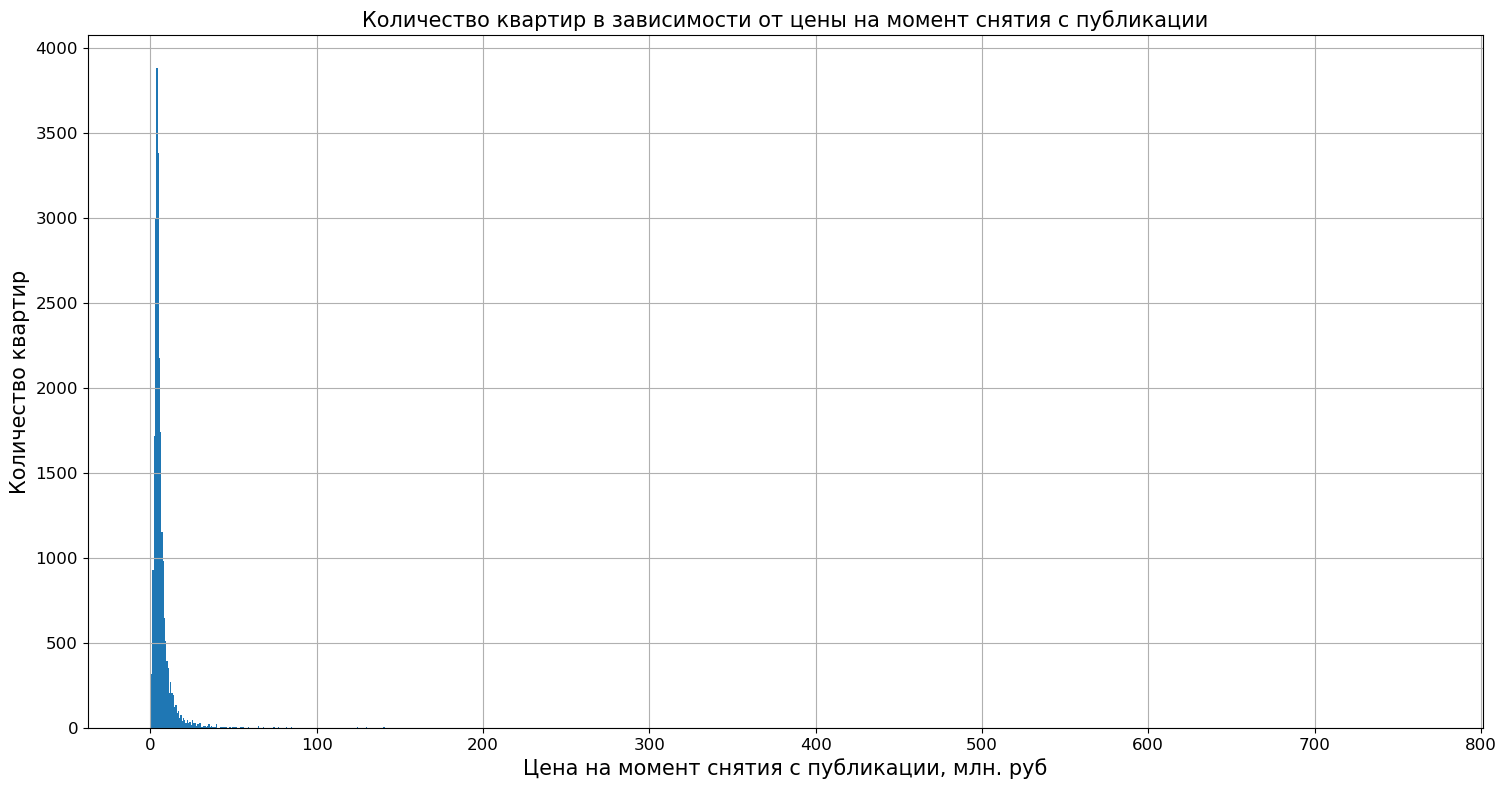

In [73]:
data['last_price'] = data['last_price']/1000000
data['last_price'].plot(
                        kind = 'hist',
                        bins = 1000,
                        figsize = (18, 9),
                        );
plt.title('Количество квартир в зависимости от цены на момент снятия с публикации', fontsize = 15)
plt.xlabel('Цена на момент снятия с публикации, млн. руб', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [74]:
data['last_price'].describe() # Дополнительно выведем характеристики, дающие представление о последней цене квартир.

count    23420.000000
mean         6.531359
std         10.514417
min          0.430000
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир имеют цену в промежутке от 3,45 до 6,8 млн.руб;
* Квартиры, чья стоимость составила более 10 млн.руб - единичные случаи;
* Наименьшая цена квартиры составляет 0,43 млн.руб (430 000 рублей), наибольшая - 763 млн.руб;
* Средняя цена квартиры равняется 6,53 млн.руб;
* Медианное значение цены квартиры равняется 4,65 млн.руб.

Построим гистрограмму, отображающую число комнат в квартире, указанную в столбце `rooms`.

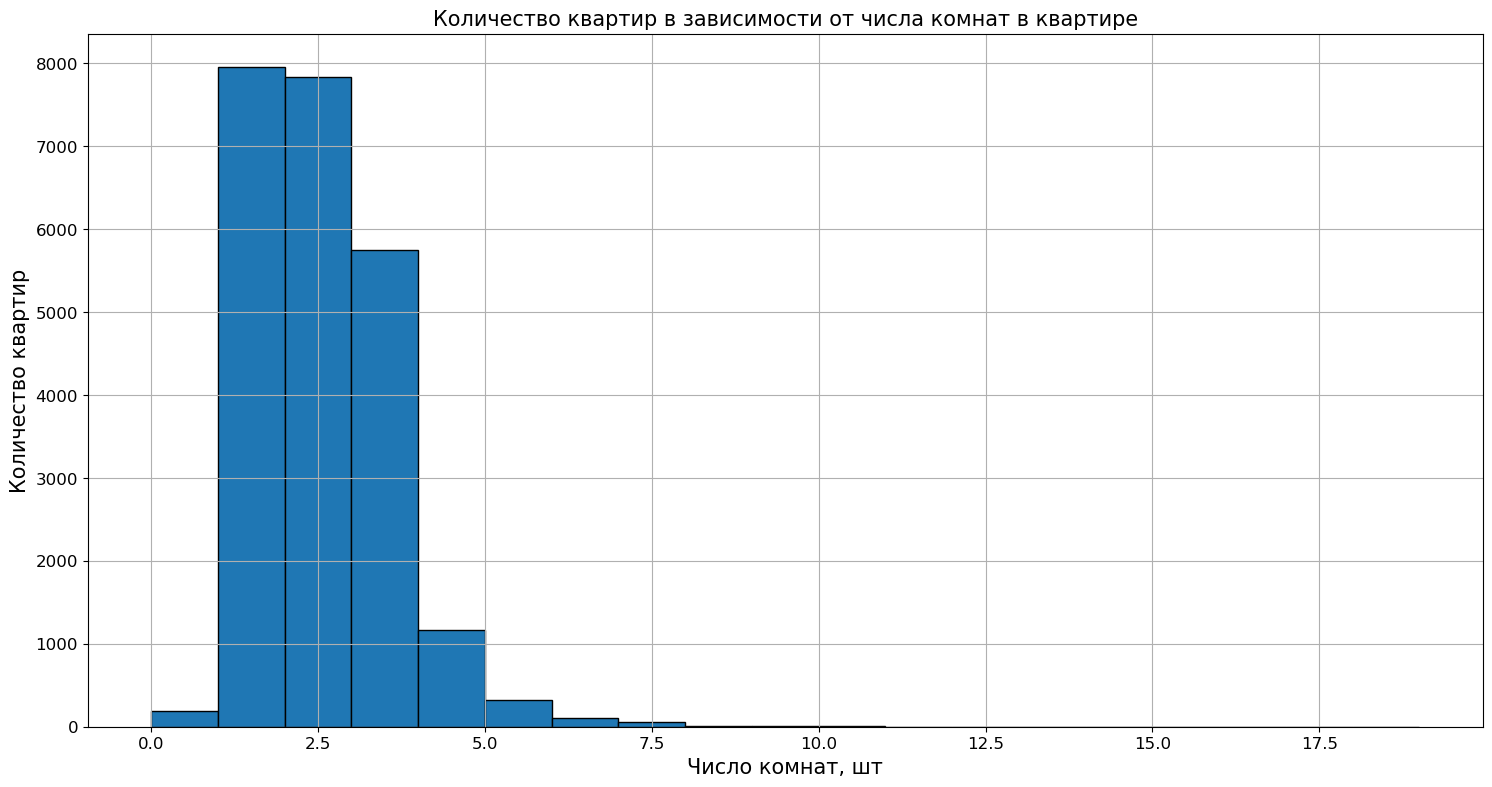

In [75]:
data['rooms'].plot(kind = 'hist',
                   bins = 19,
                   figsize = (18, 9),
                   edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от числа комнат в квартире', fontsize = 15)
plt.xlabel('Число комнат, шт', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [76]:
data['rooms'].describe() # Дополнительно выведем характеристики, дающие представление о количестве комнат.

count    23420.000000
mean         2.071093
std          1.077401
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир имеют количество комнат в промежутке от 1 до 3 шт.;
* Квартиры, у которых количество комнат более 10 - единичные случаи;
* Наименьшая количество комнат в квартире равно 0, наибольшее - 19 шт.;
* Среднее количество комнат равняется медианному значению и составляет 2 шт.

Популярность однокомнатных квартир можно объяснить тем, что они являются более доступными для тех, кто живет один. Также такие квартиры имеют хорошую рентабельность и часто покупаются с целью сдачи в аренду или дальнейшей перепродажи.

Построим гистрограмму, отображающую высоту потолков, указанную в столбце `ceiling_height`.

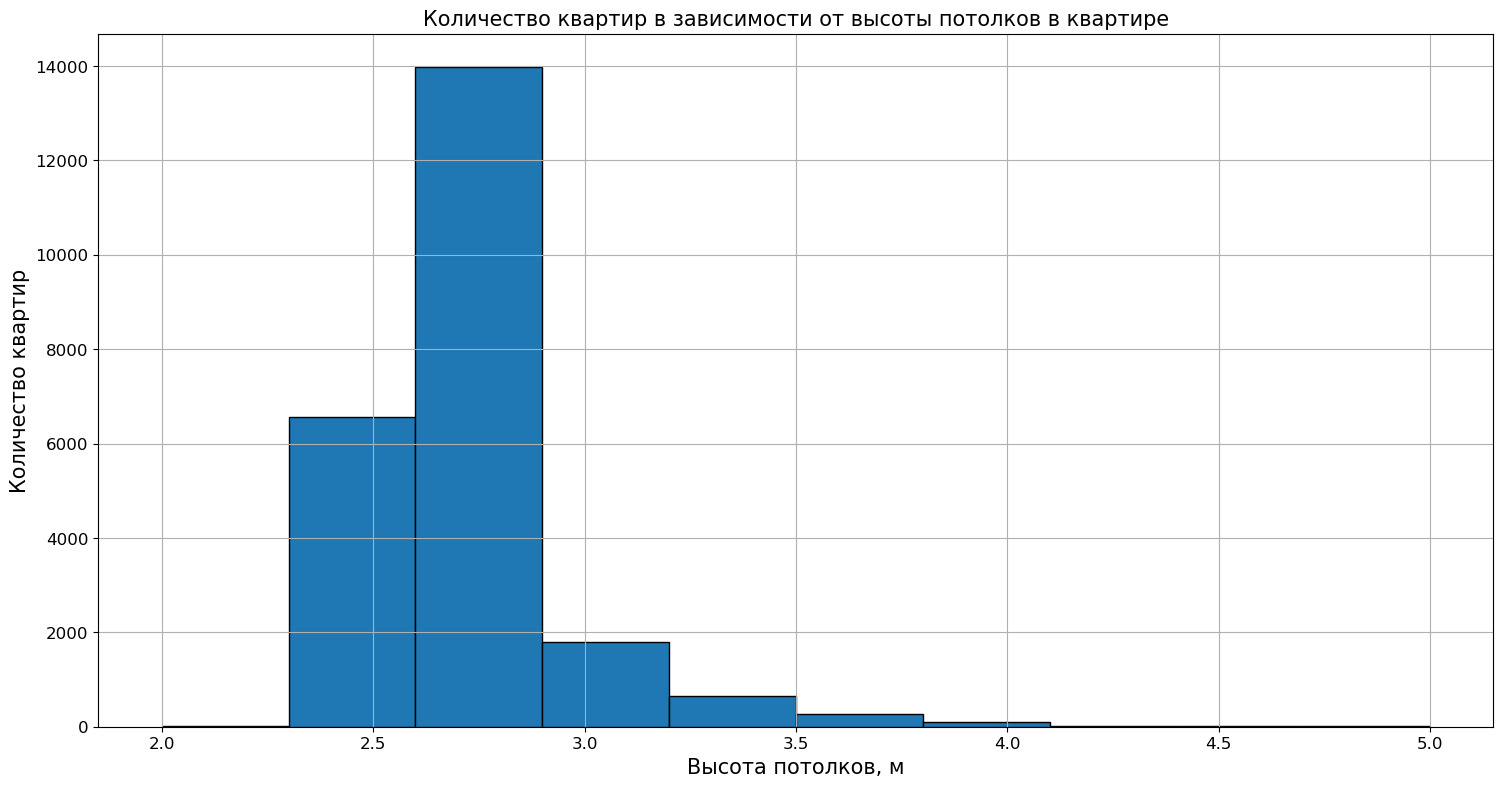

In [77]:
data['ceiling_height'].plot(kind = 'hist',
                   bins = 10,
                   figsize = (18, 9),
                   edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от высоты потолков в квартире', fontsize = 15)
plt.xlabel('Высота потолков, м', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [78]:
data['ceiling_height'].describe() # Дополнительно выведем характеристики, дающие представление о высоте потолков.

count    23420.000000
mean         2.702823
std          0.221358
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир имеют высоту потолков в промежутке от 2,55 до 2,7 м;
* Квартиры, у которых высота потолков более 4 м - единичные случаи;
* Высота самых низких потолков в квартире равняется 2 м, самых высоких - 5 м;
* Средняя высота потолков равна медианному значению и составляет 2,7 м.

Построим гистрограмму, отображающую этаж квартиры, указанный в столбце `floor`.

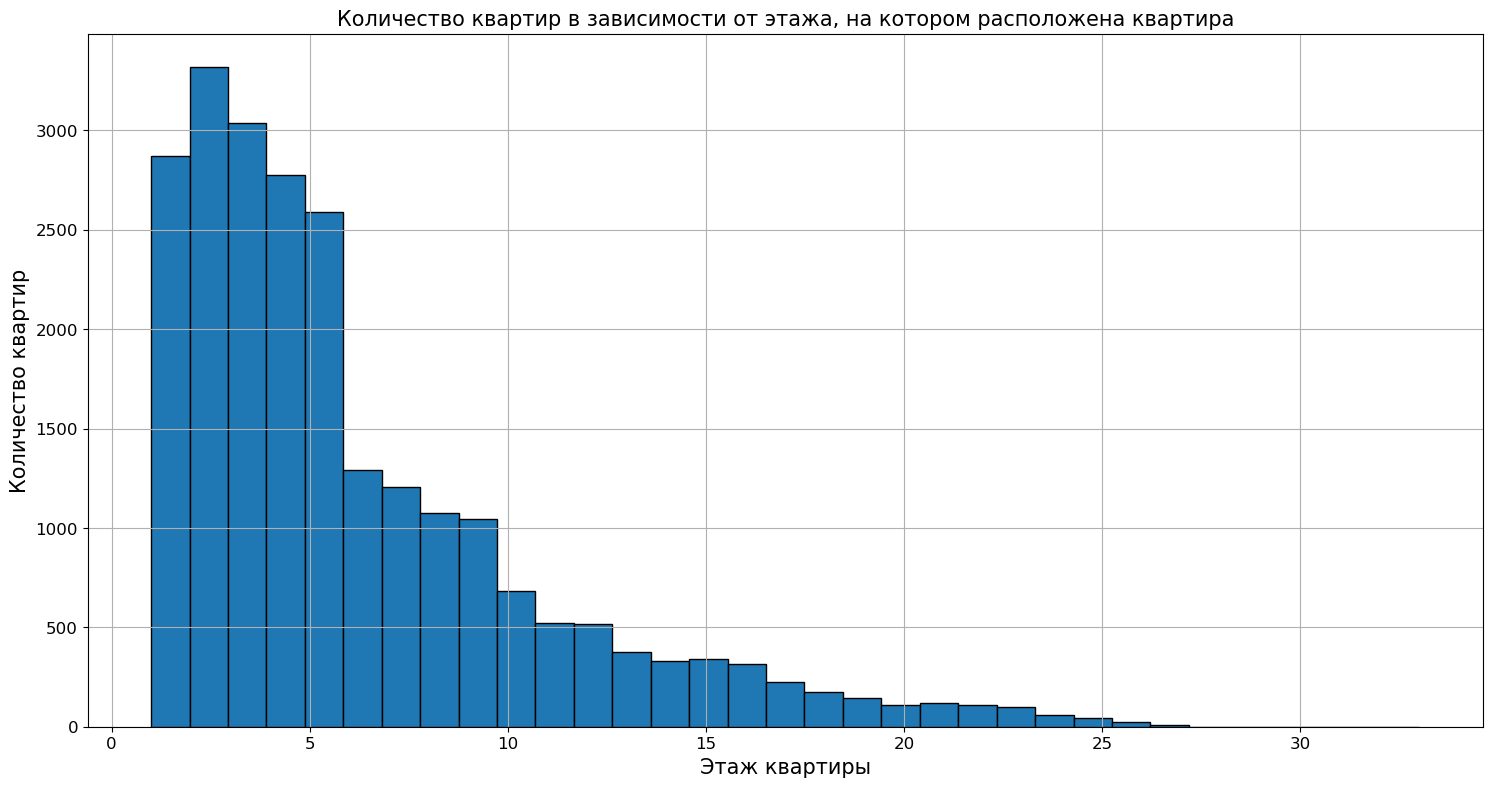

In [79]:
data['floor'].plot(kind = 'hist',
                   bins = 33,
                   figsize = (18, 9),
                   edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от этажа, на котором расположена квартира', fontsize = 15)
plt.xlabel('Этаж квартиры', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [80]:
data['floor'].describe() # Дополнительно выведем характеристики, дающие представление о этаже квартиры.

count    23420.000000
mean         5.892997
std          4.874074
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир расположены на этажах в промежутке от 2 до 8 этажа;
* Квартиры, расположенные на этаже выше 27 этажа - единичные случаи;
* Наименьший этаж квартиры равен 1, наибольший - 33;
* Средний этаж квартиры равнен 6 (округлим значение до близжайшего целого);
* Медианное значение этажа квартиры равняется 4.

Построим гистрограмму, отображающую тип этажа квартиры, указанный в столбце `type_of_flat`.

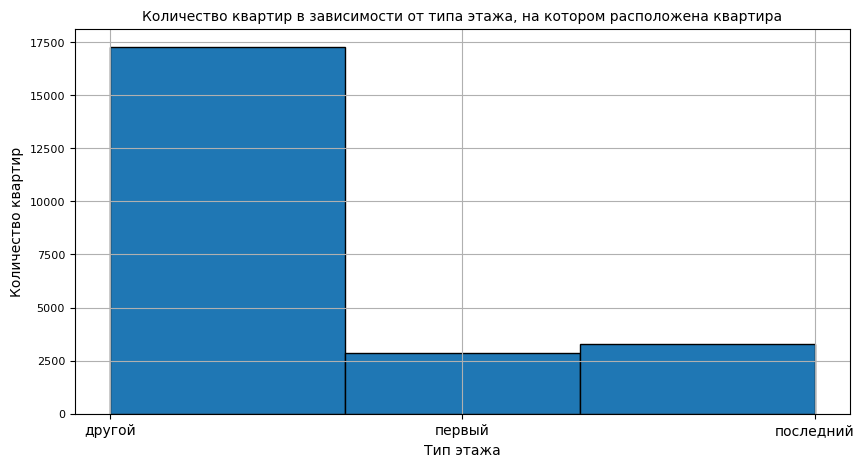

In [81]:
data['type_of_flat'].hist(
                   bins = 3,
                   figsize = (10, 5),
                   edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от типа этажа, на котором расположена квартира', fontsize = 10)
plt.xlabel('Тип этажа', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 8)
plt.ylabel('Количество квартир', fontsize = 10)
plt.grid(True);

In [82]:
data['type_of_flat'].value_counts() # Дополнительно выведем количество квартир каждого типа.

другой       17270
последний     3281
первый        2869
Name: type_of_flat, dtype: int64

**Из построенной гистрограммы и результата метода `value_counts()`, можно сделать следующие выводы:**  
* Большинство квартир относятся к типу "другой", т.е. находятся не на первом и не на последнем этажах здания, где они расположены.
* Меньше всего квартир расположено на первых этажах здания.

Возможно это связано с тем, что первый и последние этажи считаются "проблемными" - заглядывают прохожие, протекает крыша и т.д. Также стоит учитывать тот факт, что из-за особенностей строительства, первый и последний этажи - это лишь по одному этажу в каждом здании, а тип "другой" включает в себя все этажи между первым и последними этажами.

Построим гистрограмму по столбцу `floors_total`, в котором указано, сколько всего этажей в доме. 

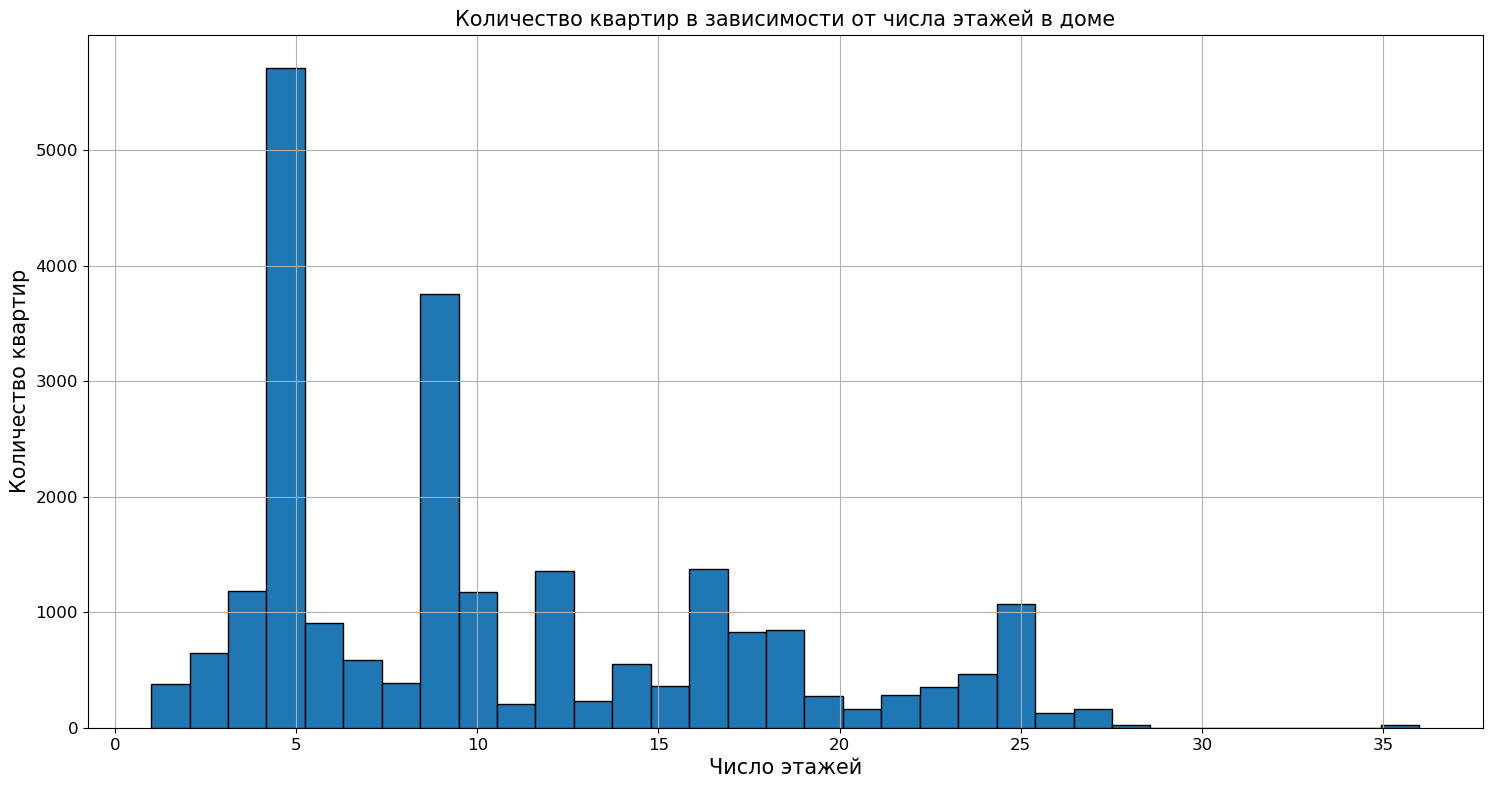

In [83]:
data['floors_total'].plot(
                    kind = 'hist',
                    bins = 33,
                    figsize = (18, 9),
                    edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от числа этажей в доме', fontsize = 15)
plt.xlabel('Число этажей', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [84]:
data['floors_total'].describe() # Дополнительно выведем характеристики, дающие представление о этажности здания

count    23420.000000
mean        10.705295
std          6.578181
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир расположены в зданиях, этажность которых находится в промежутке от 5 до 16 этажа;
* Квартиры, расположенные в зданиях, с этажностью более чем 28 этажей - единичные случаи;
* Наименьшая этажность здания равняется 1, наибольшая - 36;
* Средний этаж квартиры равнен 11 (округлим значение до близжайшего целого);
* Медианное значение этажа квартиры равняется 9.

Построим гистрограмму, отображающую расстояние до центра города, указанную в столбце `cityCenters_nearest`.

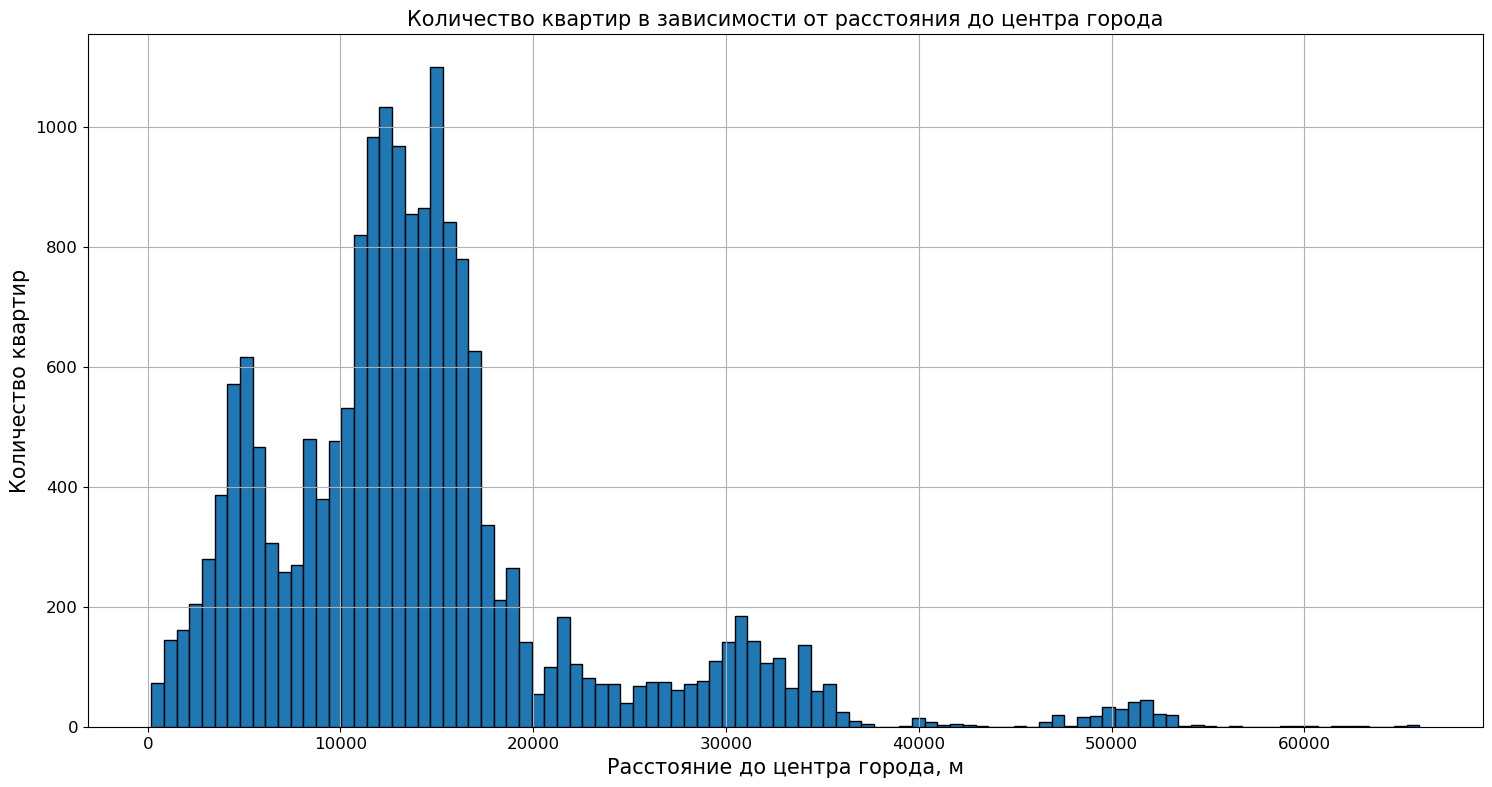

In [85]:
data['cityCenters_nearest'].plot(
                    kind = 'hist',
                    bins = 100,
                    figsize = (18, 9),
                    edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от расстояния до центра города', fontsize = 15)
plt.xlabel('Расстояние до центра города, м', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [86]:
data['cityCenters_nearest'].describe() # Дополнительно выведем характеристики, дающие представление о расстоянии до центра.

count    18039.000000
mean     14189.902877
std       8607.766944
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16282.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир расположены от центра на расстоянии в промежутке от 9 238 до 16 282 м;
* Квартиры, расположенные от центра на расстоянии более чем 55 000 м - единичные случаи;
* Наименьшее расстояние до центра равняется 181, наибольшее - 65 968;
* Среднее расстояние до центра равно 14 189 м;
* Медианное расстояние до центра равняется 13 099 м.

Построим гистрограмму, отображающую расстояние до ближайшего аэропорта, указанную в столбце `airports_nearest`.

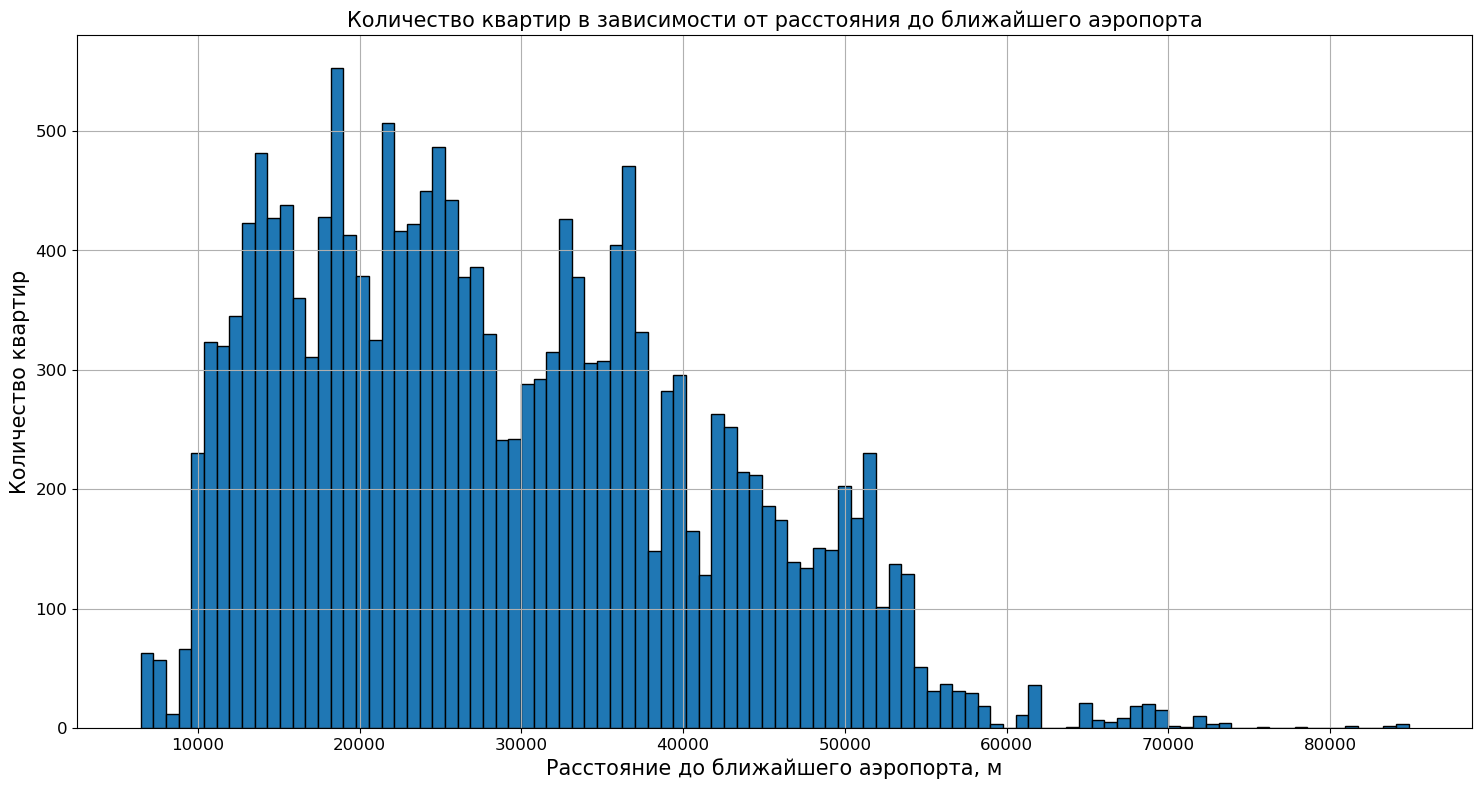

In [87]:
data['airports_nearest'].plot(
                    kind = 'hist',
                    bins = 100,
                    figsize = (18, 9),
                    edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от расстояния до ближайшего аэропорта', fontsize = 15)
plt.xlabel('Расстояние до ближайшего аэропорта, м', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [88]:
data['airports_nearest'].describe() # Дополнительно выведем характеристики, дающие представление о расстоянии близжайшего аэропорта.

count    18016.000000
mean     28797.162633
std      12630.612787
min       6450.000000
25%      18557.000000
50%      26757.500000
75%      37278.750000
max      84869.000000
Name: airports_nearest, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир расположены от аэропорта на расстоянии в промежутке от 18 557 до 37 278 м;
* Наименьшее расстояние до аэропорта равняется 6 450 м, наибольшее - 84 869 м;
* Среднее расстояние до аэропорта равно 28 797 м;
* Медианное расстояние до аэропорта равняется 26 757 м.

Построим гистрограмму, отображающую расстояние до ближайшего парка, указанную в столбце `parks_nearest`.

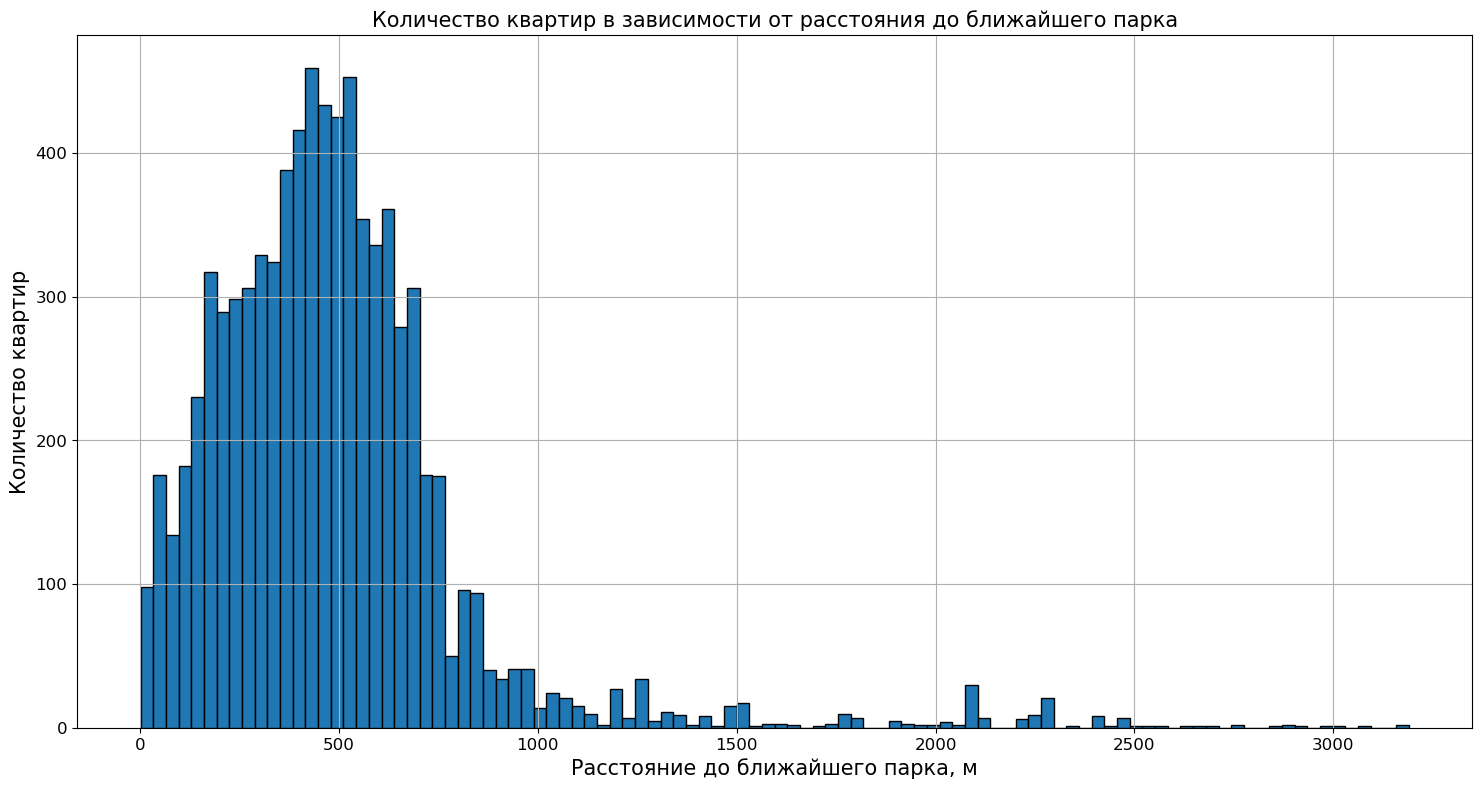

In [89]:
data['parks_nearest'].plot(
                    kind = 'hist',
                    bins = 100,
                    figsize = (18, 9),
                    edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от расстояния до ближайшего парка', fontsize = 15)
plt.xlabel('Расстояние до ближайшего парка, м', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [90]:
data['parks_nearest'].describe() # Дополнительно выведем характеристики, дающие представление о расстоянии до близжайшего парка.

count    8017.000000
mean      490.662717
std       341.735369
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир расположены от близжайшего парка на расстоянии в промежутке от 288 до 612 м;
* Квартиры, расположенные от близжайшего парка на расстоянии более чем 2 500 м - единичные случаи;
* Наименьшее расстояние до близжайшего парка равняется 1 м, наибольшее - 3190 м;
* Среднее расстояние до близжайшего парка равно 490 м;
* Медианное расстояние до близжайшего парка равняется 455 м.

**Промежуточный вывод**  
Были изучены параметры объектов и построены отдельные гистограммы для каждого из них. Дополнительно, по каждому из параметров, была выведена информация с помощью метода `describe()`. Это позволило получить ту информацию, которую не всегда было видно на графиках.

[Вернуться в начало](#Содержание)

#### Как быстро продавались квартиры?
Для этого построим гистрограмму по столбцу `days_exposition`

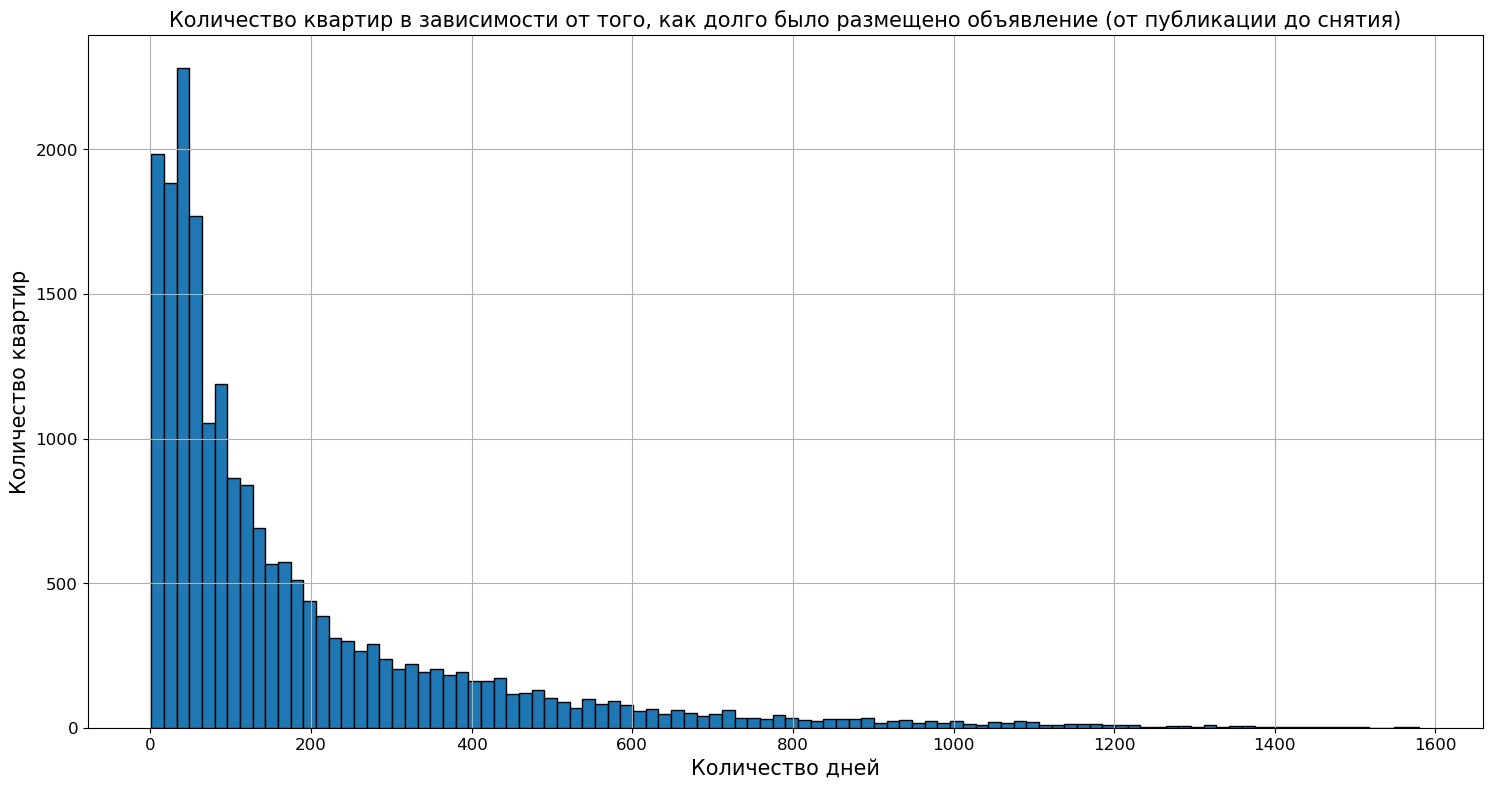

In [91]:
data['days_exposition'].plot(
                    kind = 'hist',
                    bins = 100,
                    figsize = (18, 9),
                    edgecolor='k'
                   );
plt.title('Количество квартир в зависимости от того, как долго было размещено объявление (от публикации до снятия)'
           , fontsize = 15)
plt.xlabel('Количество дней', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Количество квартир', fontsize = 15)
plt.grid(True);

In [92]:
data['days_exposition'].describe()
# Дополнительно выведем характеристики, дающие представление о том, сколько дней продавалась квартира.

count    20277.000000
mean       180.967500
std        220.012153
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Из построенной гистрограммы и результата метода `describe()`, можно сделать следующие выводы:**  
* Большинство квартир были проданы за промежуток от 45 до 232 дней;
* Наименьшее срок продажи квартиры - 1 день, наибольший - 1 580 дней (больше 4 лет);
* Среднее время продажи квартиры равно 180 дней;
* Медианное время продажи квартиры равняется 95 дням, что можно принять за обычное количество дней, за которое продается квартира;
* Быстрыми можно считать продажи тех квартир, которые были проданы менее, чем за 45 дней;
* Долгими продажами можно считать продажи тех квартир, что продавались более 232 дней. А необычно долгими - более 800 дней.

[Вернуться в начало](#Содержание)

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Построим графики, которые покажут зависимость цены от следующих параметров:  
* Общей площади;
* Жилой площади;
* Площади кухни;
* Количества комнат;
* Этажа, на котором расположена квартира (первый, последний, другой);
* Даты размещения (день недели, месяц, год).

Начнем с изучения зависимости между ценой на квартиру и общей площадью квартиры. Для этого создадим сводную таблицу, по которой построим график:

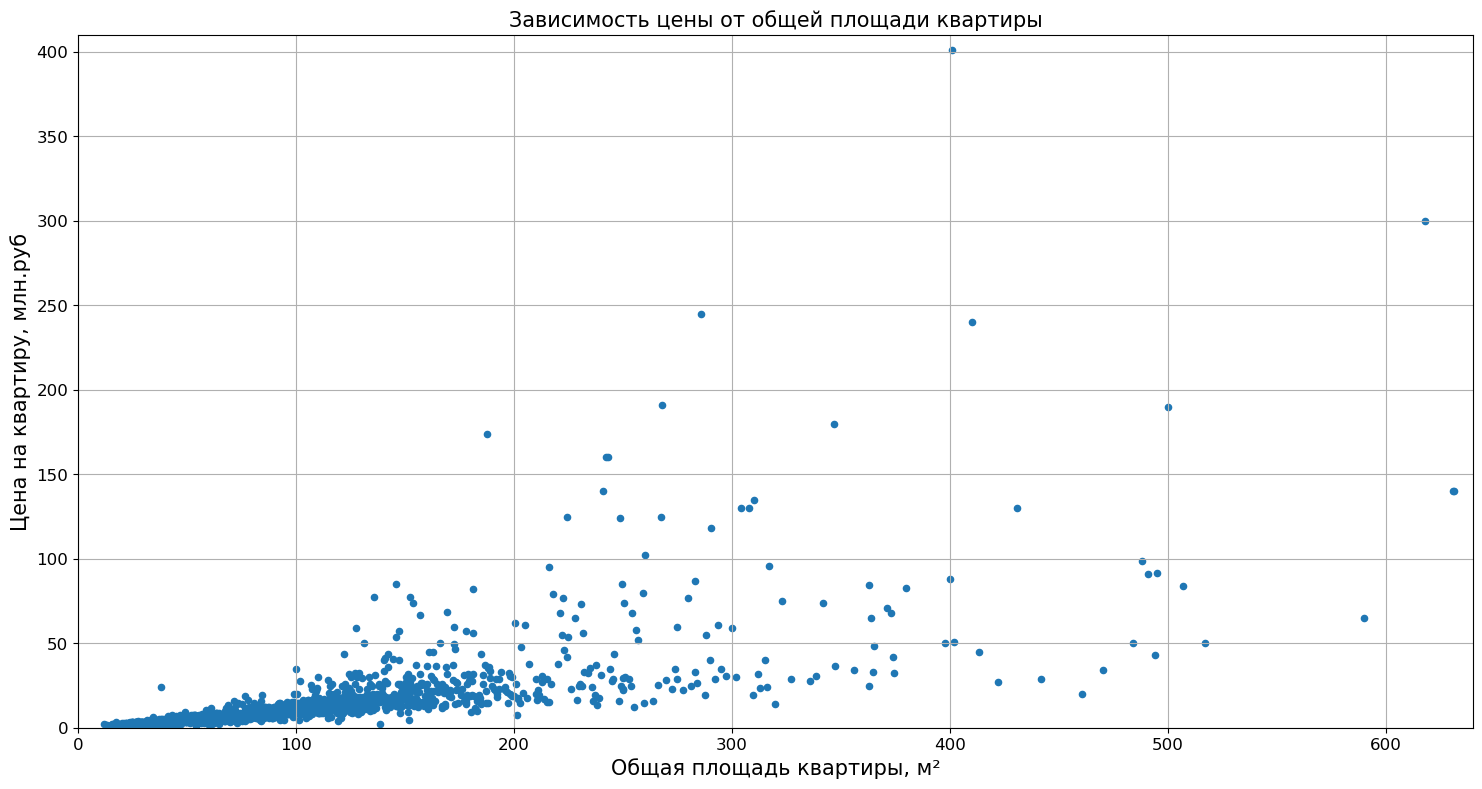

In [93]:
(   
data.pivot_table(index='total_area',
                 values='last_price',
                 aggfunc='median').reset_index()
    .plot(kind = 'scatter',
          x = 'total_area',
          y = 'last_price',
          figsize = (18, 9),
          xlim=(0,640),
          ylim=(0,410),
          alpha=1
         )
)
plt.title('Зависимость цены от общей площади квартиры', fontsize = 15)
plt.xlabel('Общая площадь квартиры, м²', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 15)
plt.grid(True);

Дополнительно найдем коэффициент корреляции Пирсона, который помогает определить наличие взаимосвязей между величинами.

In [94]:
print (data['total_area'].corr(data['last_price']))

0.6411863228780434


**Из построенной гистрограммы и найденного коэффициента корреляции, можно сделать следующий вывод:**
* Зависимость между ценой квартиры и её общей площадью есть, но эта зависимость не слишком сильна. Т.е. при увеличении общей площади, будет увеличиваться и цена на квартиру, но не сильно.

Далее изучим зависимость между ценой на квартиру и жилой площадью квартиры:

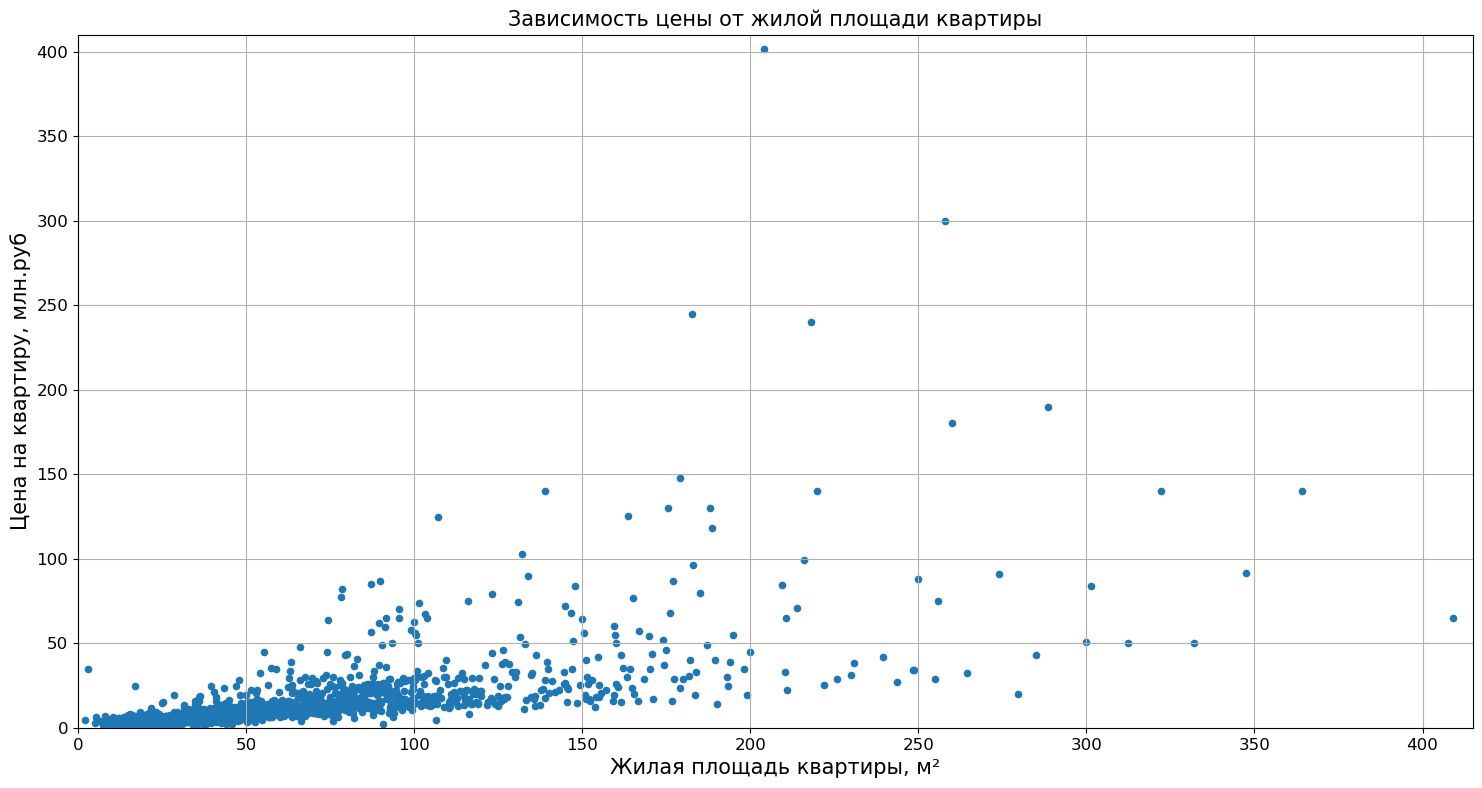

In [95]:
(   
data.pivot_table(index='living_area',
                 values='last_price',
                 aggfunc='median').reset_index()
    .plot(kind = 'scatter',
          x = 'living_area',
          y = 'last_price',
          figsize = (18, 9),
          xlim=(0,415),
          ylim=(0,410),
          alpha=1
         )
)
plt.title('Зависимость цены от жилой площади квартиры', fontsize = 15)
plt.xlabel('Жилая площадь квартиры, м²', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 15)
plt.grid(True);

In [96]:
print (data['living_area'].corr(data['last_price'])) # Находим коэффициент корреляции Пирсона

0.5772142367824383


**Из построенной гистрограммы и найденного коэффициента корреляции, можно сделать следующий вывод:**  
* Зависимость между ценой квартиры и её жилой площадью есть, но эта зависимость не слишком сильна. Т.е. при увеличении жилой площади, будет увеличиваться и цена на квартиру, но не сильно.
Данная зависимость практически идентична зависимости общей площади от цены, т.к. общая площадь включает в себя жилую.

Далее изучим зависимость между ценой на квартиру и площадью кухни в квартире:

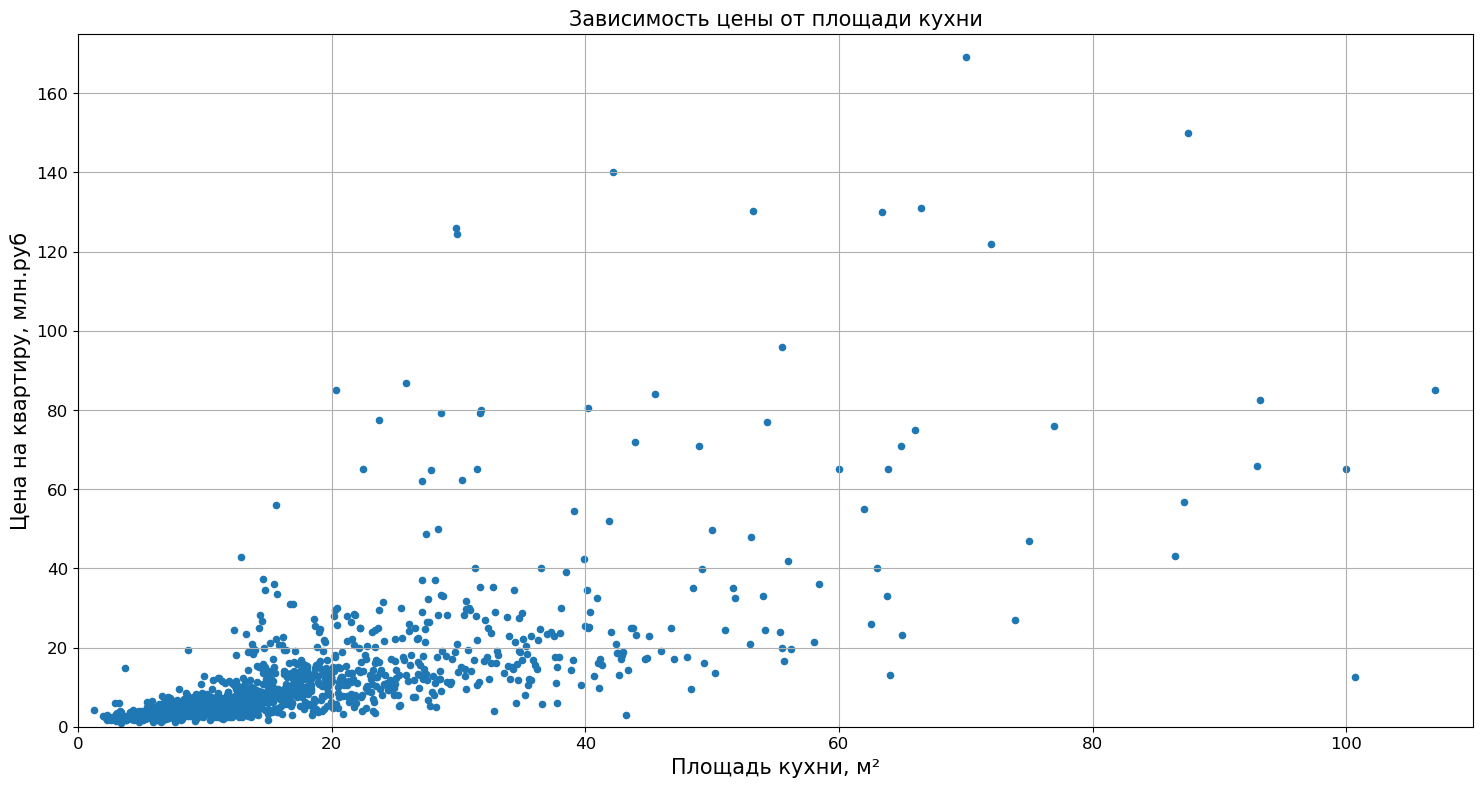

In [97]:
(   
data.pivot_table(index='kitchen_area',
                 values='last_price',
                 aggfunc='median').reset_index()
    .plot(kind = 'scatter',
          x = 'kitchen_area',
          y = 'last_price',
          figsize = (18, 9),
          xlim=(0,110),
          ylim=(0,175),
          alpha=1
         )
)
plt.title('Зависимость цены от площади кухни', fontsize = 15)
plt.xlabel('Площадь кухни, м²', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 15)
plt.grid(True);

In [98]:
print (data['kitchen_area'].corr(data['last_price'])) # Находим коэффициент корреляции Пирсона

0.503714368922153


**Из построенной гистрограммы и найденного коэффициента корреляции, можно сделать следующий вывод:** 
* Зависимость между ценой квартиры и площадью кухни есть, но эта зависимость не слишком сильна. Т.е. при увеличении площади кухни, будет увеличиваться и цена на квартиру, но не сильно.
Данная зависимость практически идентична зависимости общей площади от цены, т.к. общая площадь включает в себя площадь кухни.

Далее изучим зависимость между ценой на квартиру и количеством комнат квартиры:

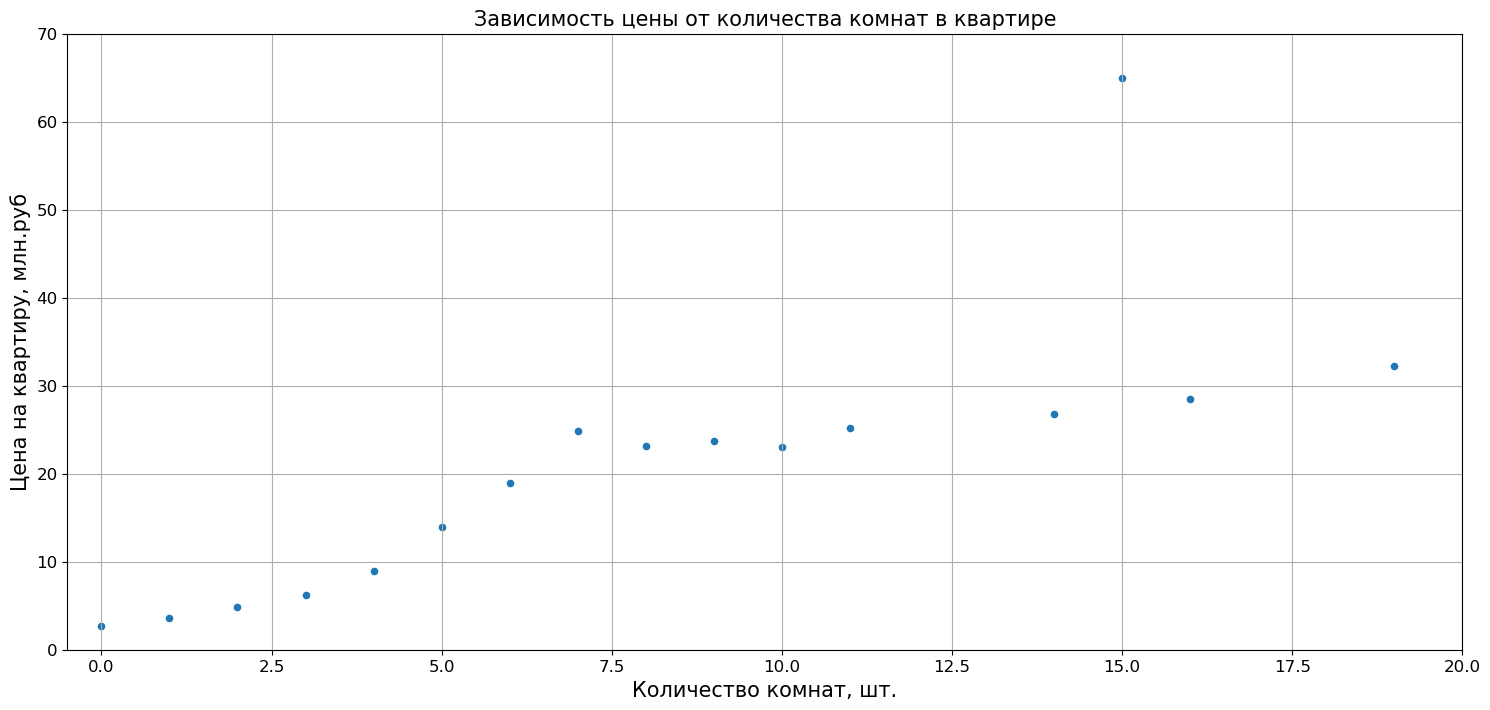

In [99]:
(   
data.pivot_table(index='rooms',
                 values='last_price',
                 aggfunc='median').reset_index()
    .plot(kind = 'scatter',
          x = 'rooms',
          y = 'last_price',
          figsize = (18, 8),
          xlim=(-0.5,20),
          ylim=(0,70),
          alpha=1
         )
)
plt.title('Зависимость цены от количества комнат в квартире', fontsize = 15)
plt.xlabel('Количество комнат, шт.', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 15)
plt.grid(True);

In [100]:
print (data['rooms'].corr(data['last_price'])) # Находим коэффициент корреляции Пирсона

0.3596165143946032


**Из построенной гистрограммы и найденного коэффициента корреляции, можно сделать следующий вывод:**  
* Зависимость между ценой квартиры и количеством комнат есть. Как видно из графика - при росте количества комнат растет и цена на квартиру. Но эта зависимость не слишком сильна. Т.е. при увеличении количества комнат, будет увеличиваться и цена на квартиру, но не сильно. Однако, для квартир, с количеством комнат равным 15, цена сильно увеличивается. Возмножно, из-за этого "скачка", коэффициент корреляции искажен. При необходимости в более детальном исследовании необходимо будет убрать выбивающееся значение, чтобы повторно построить график и пересчитать коэффициент корреляции.

Далее изучим зависимость между ценой на квартиру и типом этажа, на котором расположена квартира:

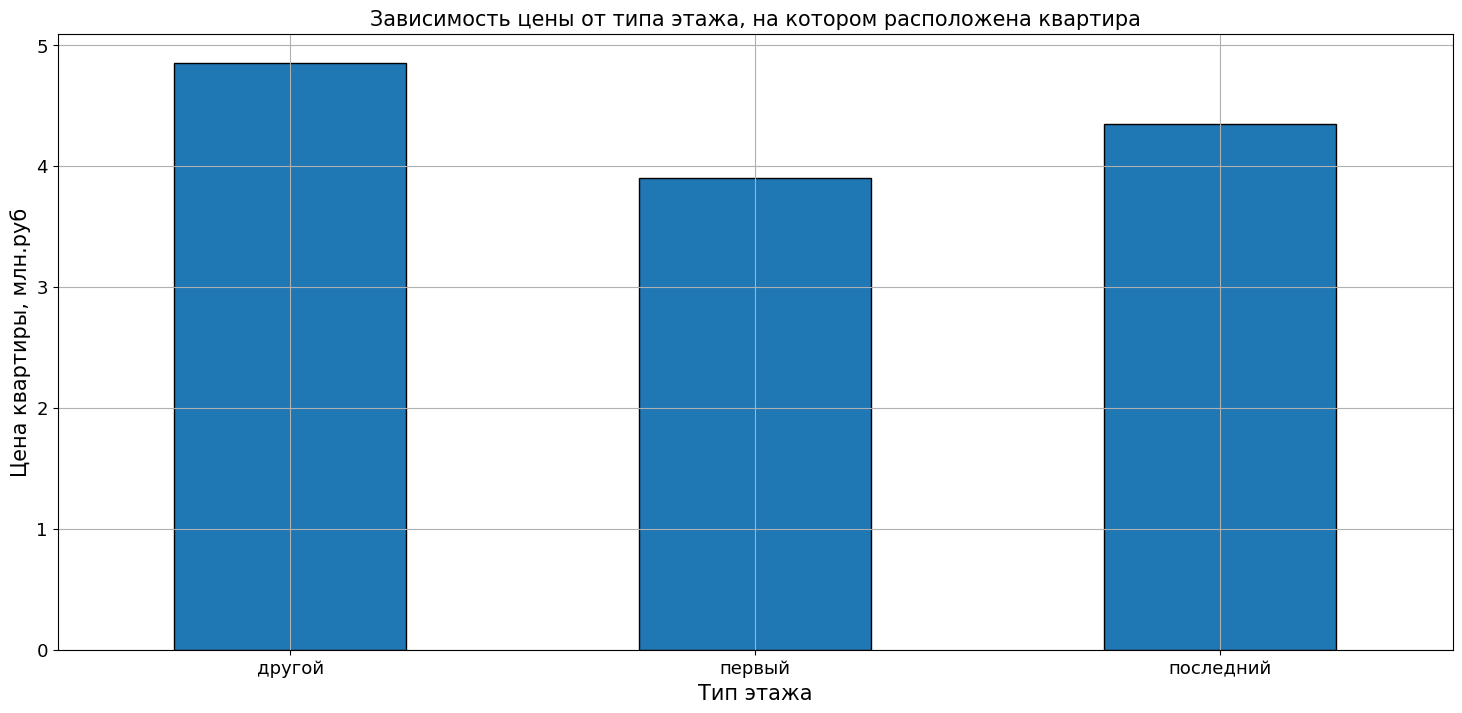

In [101]:
(   
data.pivot_table(index='type_of_flat',
                 values='last_price',
                 aggfunc='median')
    .plot(kind='bar',
          figsize=(18, 8),
          edgecolor='k',
          legend = False
         )
)
plt.title('Зависимость цены от типа этажа, на котором расположена квартира', fontsize = 15)
plt.xlabel('Тип этажа', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Цена квартиры, млн.руб', fontsize = 15)
plt.grid(True);

**Из построенной столбчатой диаграммы можно сделать следующий вывод:**  
* Зависимость между ценой квартиры и типом этажа, на котором расположена квартира - есть. Для квартир, расположенных на первом этаже, цена минимальна. Далее идут квартиры - расположенные на последнем этаже. Ну и самым дорогим типом квартиры является "другой", т.е. квартиры, расположенные не на первом и не на последнем этажах.

Далее изучим зависимость между ценой на квартиру и днем размещения объявления:

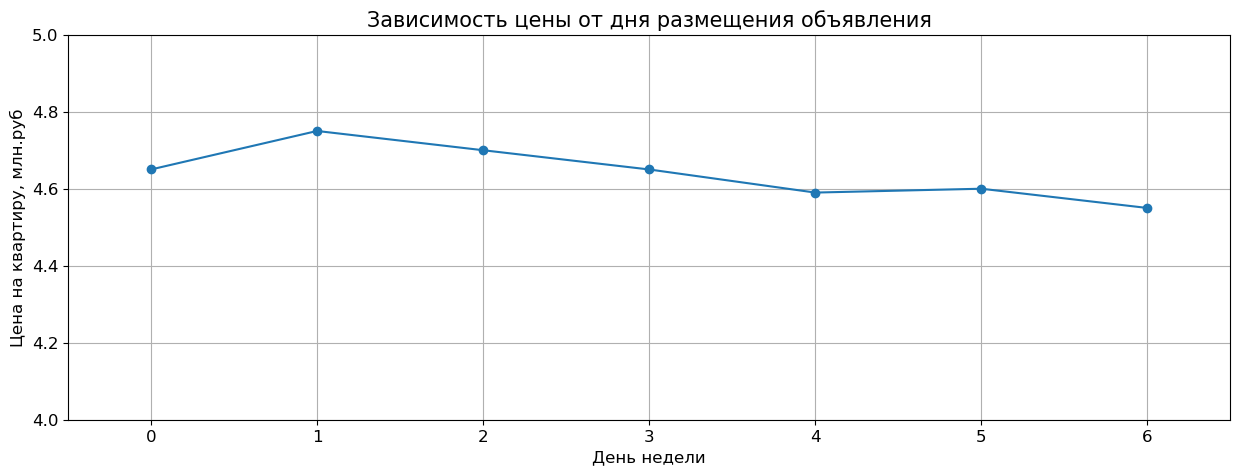

In [102]:
(
data.pivot_table(index='week_day_exposition',
                 values='last_price',
                 aggfunc='median')
    .plot(figsize=(15, 5),
          style='o-',
          xlim=(-0.5,6.5),
          ylim=(4,5),
          legend = False
         )
)
plt.title('Зависимость цены от дня размещения объявления', fontsize = 15)
plt.xlabel('День недели', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 12)
plt.grid(True);

In [103]:
print (data['week_day_exposition'].corr(data['last_price'])) # Находим коэффициент корреляции Пирсона

0.002396764086113724


**Из построенного графика можно сделать следующий вывод:**  
* Зависимость между ценой квартиры и днем размещения объявления - отсутствует. В не зависимости от того, в какой день недели было размещено объявление - цена на на квартиру не меняется. Коэффициент корреляции, равный приблизительно 0 говорит о том, что при изменении дня размещения объявления, цена на квартиру не изменится.

Далее изучим зависимость между ценой на квартиру и месяцем размещения объявления:

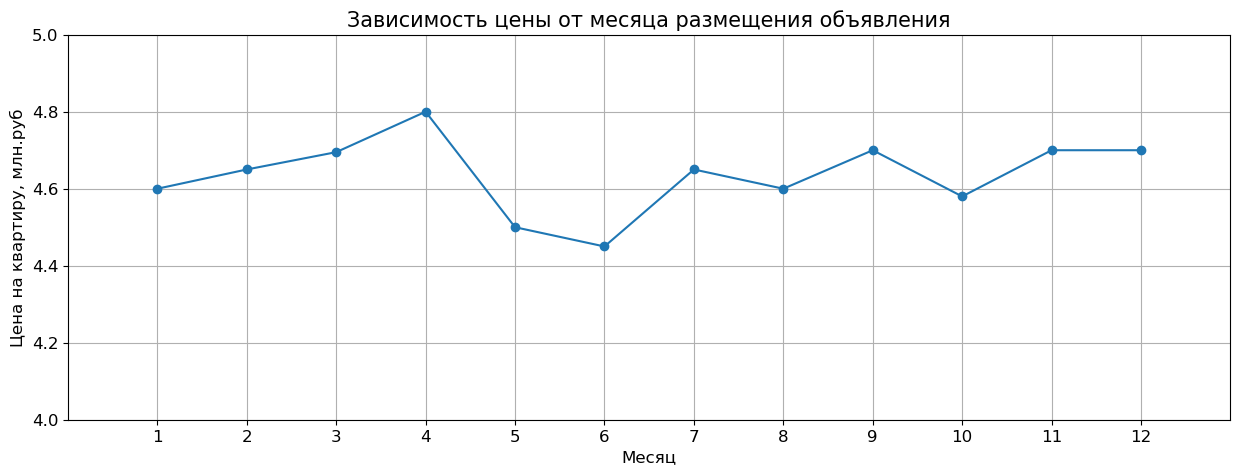

In [104]:
(
data.pivot_table(index='month_exposition',
                 values='last_price',
                 aggfunc='median')
    .plot(figsize=(15, 5),
          style='o-',
          xlim=(0,13),
          ylim=(4,5),
          legend = False
         )
)
plt.title('Зависимость цены от месяца размещения объявления', fontsize = 15)
plt.xlabel('Месяц', fontsize = 12)
x_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.xticks (ticks=x_ticks, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 12)
plt.grid(True);

In [105]:
print (data['month_exposition'].corr(data['last_price'])) # Находим коэффициент корреляции Пирсона

-0.00040336830064421745


**Из построенного графика можно сделать следующий вывод:**  
* Зависимость между ценой квартиры и месяцем размещения объявления - отсутствует. В не зависимости от того, в какой месяц было размещено объявление - цена на на квартиру не меняется. Коэффициент корреляции, приблизительно равный 0 говорит о том, что при изменении месяца размещения объявления, цена на квартиру не изменится.

Далее изучим зависимость между ценой на квартиру и годом размещения объявления:

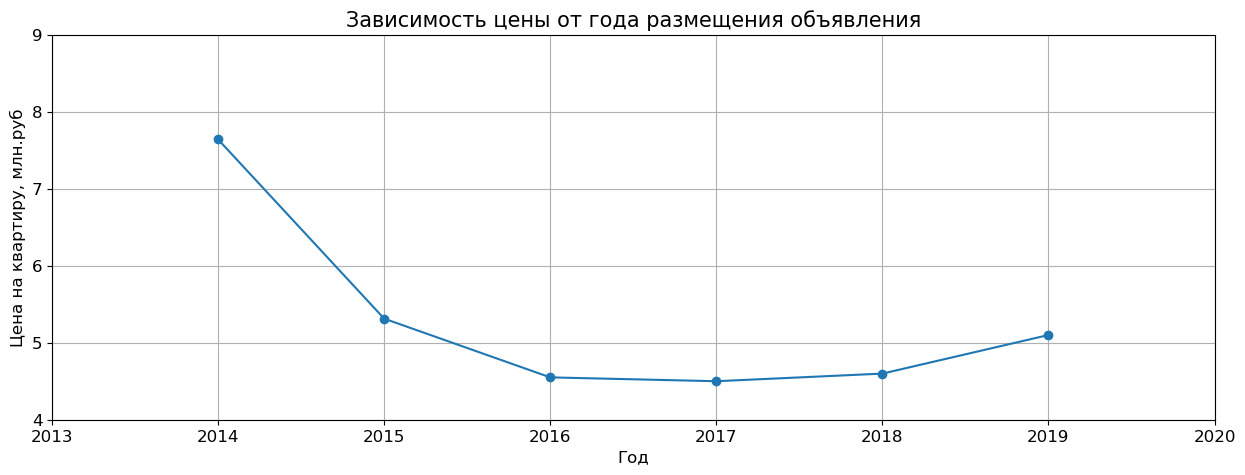

In [106]:
(
data.pivot_table(index='year_exposition',
                 values='last_price',
                 aggfunc='median')
    .plot(figsize=(15, 5),
          style='o-',
          xlim=(2013,2020),
          ylim=(4,9),
          legend = False
         )
)
plt.title('Зависимость цены от года размещения объявления', fontsize = 15)
plt.xlabel('Год', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 12)
plt.grid(True);

In [107]:
print (data['year_exposition'].corr(data['last_price'])) # Находим коэффициент корреляции Пирсона

-0.04292268077176338


**Из построенного графика можно сделать следующий вывод:**  
* Зависимость между ценой квартиры и годом размещения объявления - отсутствует. В не зависимости от того, в каком году было размещено объявление - цена на на квартиру не меняется. Коэффициент корреляции, равный 0,04 говорит о том, что при изменении года размещения объявления, цена на квартиру не изменится.  
Но, как можно заменить - цена в 2014 году имеет максимальное значение. Это связано с тем, что в 2014 году в России произошел кризис, в том числе на рынке недвижимости. По мере прекращения кризиса, цены на недвижимость начинали снижаться.


**Из построенных графиков, с помощью которых необходимо было выявить какие факторы больше всего влияют на общую (полную) стоимость объекта, можно сделать следующие промежуточные выводы:**  
* Наибольшее влияние на цену квартиры оказывает общая площадь квартиры;
* Наименьшее влияние на цену квартиры оказывают день и месяц размещения объявления.

[Вернуться в начало](#Содержание)

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Для этого построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. 

In [108]:
#data.head() # Для удобства выведем первые 5 строчек таблицы

In [109]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15633
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [110]:
#Создаем список, в котором будут топ-10 населенных пунктов с наибольшим количеством объявлений
top_10_locality = data['locality_name'].value_counts().head(10) 
#Создаем список, в котором будут названия топ-10 населенных пунктов с наибольшим количеством объявлений.
name_top_10_locality = top_10_locality.head(10).index
#Создаем новую таблицу, в который с помощью среза, будут включены все квартиры, расположенные в одном из 10 необходимых населенных пунктах
data_top_10 = data.query('locality_name in @name_top_10_locality')
data_top_10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1_meter_price,week_day_exposition,month_exposition,year_exposition,type_of_flat,distance_km
0,20,13.000,108.00,2019-03-07,3,2.700,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3.350,40.40,2018-12-04,1,2.615,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.700,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64.900,159.00,2015-07-24,3,2.700,14,91.730769,9,False,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10.000,100.00,2018-06-19,2,3.030,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3.550,35.30,2018-02-28,1,2.860,15,16.300000,4,False,...,353.0,2.0,652.0,29.0,100566,2,2,2018,другой,16.0
23690,3,5.500,52.00,2018-07-19,2,2.700,5,31.000000,2,False,...,300.0,0.0,NaN,15.0,105769,3,7,2018,другой,6.0
23691,11,9.470,72.90,2016-10-13,2,2.750,25,40.300000,7,False,...,NaN,1.0,806.0,519.0,129903,3,10,2016,другой,4.0
23694,9,9.700,133.81,2017-03-21,3,3.700,5,73.300000,3,False,...,796.0,3.0,381.0,NaN,72490,1,3,2017,другой,4.0


По полученной таблице строим сводную:

In [111]:
data_top_10.pivot_table(index='locality_name', values='1_meter_price', aggfunc=['mean', 'count', 'median'])

,mean,count,median
,1_meter_price,1_meter_price,1_meter_price
locality_name,,,
Всеволожск,68654.007538,398,65789.0
Выборг,58141.489451,237,58158.0
Гатчина,68745.693811,307,67796.0
Колпино,75424.147929,338,74723.5
Кудрово,95260.380851,470,95555.0
Мурино,86040.655290,586,86249.5
Парголово,90175.486239,327,91642.0
Пушкин,103125.368564,369,100000.0


Дополнительно выведем график,на котором будет отображена средняя цена одного квадратного метра по каждому из 10 населенных пунктов и количество таких объявлений

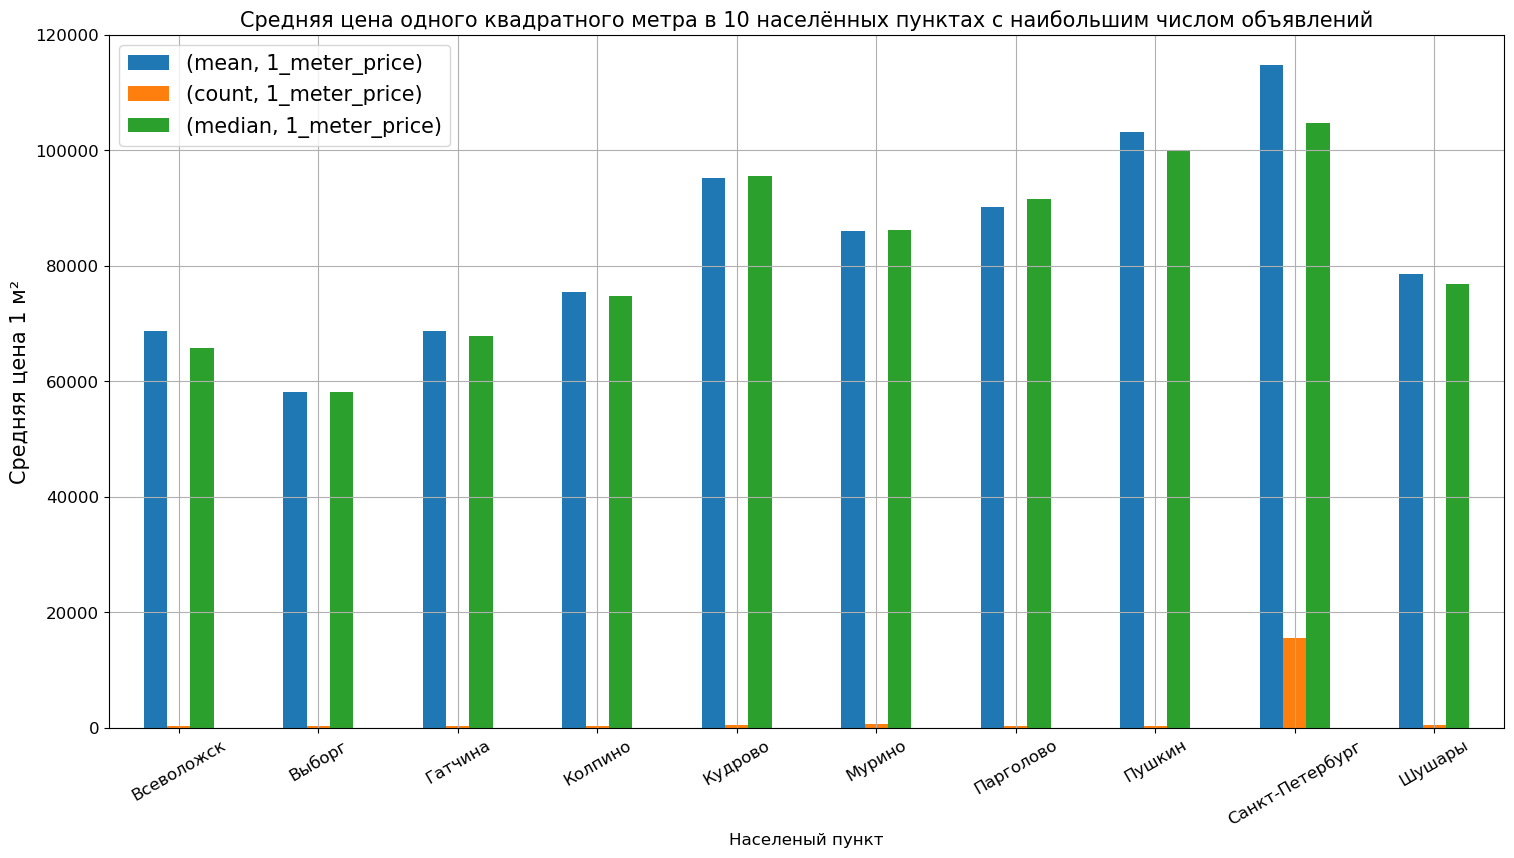

In [112]:
(   
data_top_10.pivot_table(index='locality_name',
                        values='1_meter_price',
                        aggfunc=['mean', 'count', 'median'])
    .plot(kind='bar',
          figsize=(18, 9),
          ylim=(0,120000)
         )
)
plt.title('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений', fontsize = 15)
plt.xlabel('Населеный пункт', fontsize = 12)
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Средняя цена 1 м²', fontsize = 15)
plt.legend(fontsize= 15)
plt.grid(True);

**Из построенного графика и полученной сводной таблицы можно сделать следующий вывод:**  
* Самая высокая средняя стоимость одного квадратного метра и самое большое количество объявлений - в Санкт-Петербурге;
* Самая низкая средняя стоимость одного квадратного метра и самое низкое количество объявлений - в Выборге.

[Вернуться в начало](#Содержание)

#### Как стоимость объектов зависит от расстояния до центра города Санкт-Петербурга?
Для этого построим сводную таблицу:

In [113]:
# Создаем таблицу, в которую войдут все объявления из Санкт-Петербурга
data_Piter = data[data['locality_name'] == 'Санкт-Петербург']
# Создаем сводную таблицу
data_Piter_pivot = data_Piter.pivot_table(index='distance_km', values='last_price', aggfunc='mean')
data_Piter_pivot

,last_price
distance_km,
0.0,31.449116
1.0,21.274819
2.0,17.788320
3.0,11.137395
4.0,13.317968
5.0,14.302228
6.0,15.133348
7.0,14.543524
8.0,9.247926


По полученной сводной таблице построим график

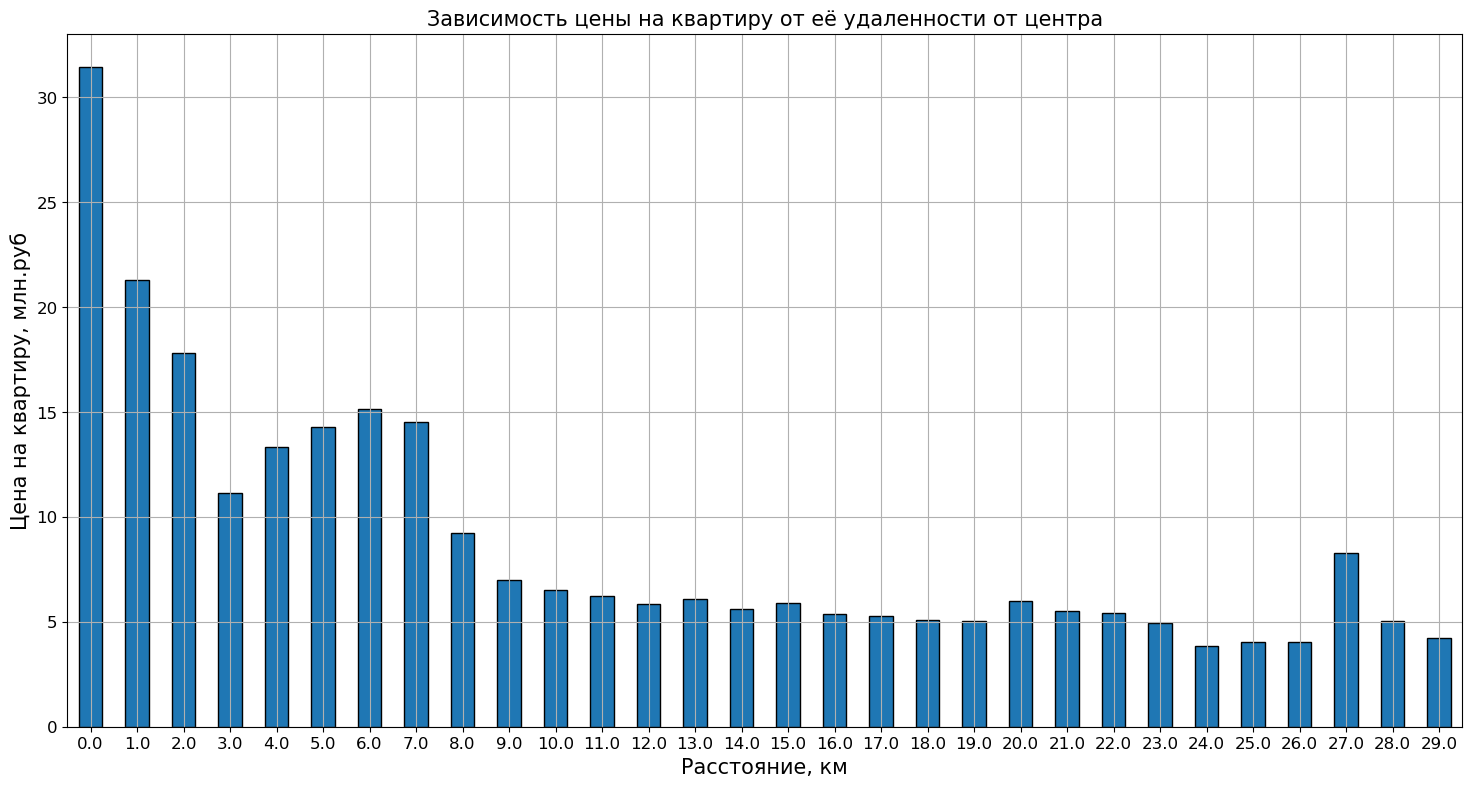

In [114]:
(
data_Piter_pivot.plot(figsize=(18, 9), 
                      kind = 'bar', 
                      legend = False,
                      edgecolor='k'
                     )
)
plt.title('Зависимость цены на квартиру от её удаленности от центра', fontsize = 15)
plt.xlabel('Расстояние, км', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Цена на квартиру, млн.руб', fontsize = 15)
plt.grid(True);

**Из построенного графика и полученной сводной таблицы можно сделать следующий вывод:**  
* Зависимость между ценой на квартиру от её удаленности от центра определенно есть. Самые дорогие квартиры находятся в центре города. При отдалении от центра - стоимость снижается.

[Вернуться в начало](#Содержание)

### Общий вывод

В данном исследовании объявлений по продаже квартир, главной задачей было провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Данная работа позволит построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность.\
Для выполнения поставленной задачи, от заказчика были предоставлены данные сервиса Яндекс Недвижимость. Они представляют собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.\
Проведенное исследование было выполнено в несколько этапов:  
1. Открытие файла и изучение общей информации.\
На этом этапе данные были открыты и разделены между собой, т.к. в исходном файле колонки данных были соединены. Также была выведена гистограммма для всех числовых столбцов.
2. Предобработка данных.\
На данном этапе были выявлены все пропущенные значения в датафрейме. Пропущенные значения были заполнены там, где это было возможно. Был изменен тип данных в некоторых столбцах. Были изучены уникальные значения в каждом из столбцов. В столбце `locality_name` избавились от неявных дубликатов.
3. Добавление в таблицу новых столбцов.\
На данном этапе в таблицу были добавлены новые столбцы, которые помогли нам при проведении исследования. Также, дополнительно была построена гистрограмма для всех числовых столбцов таблицы, отображенная на одном графике.
4. Проведение исследовательского анализа данных\
Были изучены определенные параметры квартир, а также как быстро продавались квартиры.\
В ходе исследования было выявлено, какие параметры больше всего влияют на общую (полную) стоимость квартиры. Самое большое влияние на цену квартиры оказывает общая площадь квартиры, а наименьшее влияние на цену квартиры оказывают день и месяц размещения объявления.\
Была посчитана средняя цена квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. Самая высокая средняя цена одного квадратного метра и самое большое количество объявлений - в Санкт-Петербурге. Самая низкая средняя цена одного квадратного метра и самое низкое количество объявлений - в Выборге.\
Была вычислена средняя цена каждого километра для квартир из Санкт-Петербурга. Выявлено, что самые дорогие квартиры находятся в центре города. При отдалении от центра - стоимость снижается.

Как итог исследования, перечислим параметры, которые влияют на цену квартир:
* Удаленность от центра Санкт-Петербурга. Но эта зависимость применима только для квартир, расположенных в Санкт-Петербурге;
* Общая площадь квартиры и, как следствие, её жилая и кухонная площади, а также общее количество комнат.
* Этаж квартиры. Наиболее дешевые квартиры находятся на первом и последних этажах. 

Параметры, которые не влияют или почти не влияют на цену квартир:  
* День и месяц размещения объявления;
* Год публикации объявления не так важен, как может показаться из графика. Но зная год публикации объявления, можно понять, какая ситуация была в целом на рынке недвижимости на тот момент. Н-р, высокие цены в 2014 году из-за кризиса.
* Этажность здания, в котором находится квартира.

Для улучшения автоматизированной системы, считаю, что необходимо пересмотреть способ сбора данных и внести следующие изменения: 
* Добавить в таблицу параметр с годом постройки здания, в котором находится квартира. Данный параметр определенно играет большую роль в ценообразовании квартиры. Если это старый фонд, то это может быть здание малоэтажной постройки и соответственно в нем может не быть лифта.
* Добавить в таблицу параметр с состояним квартиры. Необходимо понимать, в каком состоянии находится квартира, требуется ли там ремонт и если да, то какой сложности. Если квартира в "новостройке", то необходимо понимать, в каком виде она будет сдаваться - чистовая отделка или "голые стены".
* Улучшить систему сбора данных полученных автоматически на основе картографических данных. Большое количество пропусков в этих данных не дает возможности провести полноценное исследование по таким параметрам.

Дополнительно следует изучить следующие параметры:
* Количество балконов. Т.к. наличие балкона увеличивает общую площадь квартиры, то возможно этот параметр будет иметь небольшое влияние на итоговую стоимость квартиры;
* Из построенных графиков данного исследования можно заметить, что при сильно больших значениях площади квартиры, цена на квартиру сильно колеблется. Т.к. больших квартир на рынке меньше и большинство квартир имеют площадь до 100 м², можно провести дополнительный анализ, предварительно отбросив квартиры, чья общая площадь больше 100 м².

[Вернуться в начало](#Содержание)